<center><font size =8> Visa Approval Prediction Model for EasyVisa </font></center>

#Criteria 1

##Context

In the US business communites required lots of human resources however they are struggling to find the right talent. Being compatetive comapnies are hiring from the local and foreign countries. Throgh the process of Immigiration and Nationality Act(INA) foreign workers can work in the USA either for temporary or permanent. This is handly by the Government department in the USA called Office of Foreign Labor Certification (OFLC). Companies has to prove that there are not enough workers in the US and they are providing fair wages to foreign worker then only Office of Foreign Labor Certification (OFLC) consider to approve ther application to hire foriegn workers.  

##Objective

Number of application are increasing every year and it is very hard and time taking to process to verify each application manually. To make this tedious task easy we are making the classification machine learning model that will help OFLC to shortlist those application which has higher chances to get approval. Goal of the Model is to make the process faster of Visa approval and recommend the suitable profile for applicants through which selection and rejection would be easy based on significant drivers.

In [1]:
!pip install imbalanced-learn

#Importing the libraries

In [50]:
import pandas as pd                   #To manupulate the data
import numpy as np                    #To perform the numerical operation
import matplotlib.pyplot as plt       #To visualize the plot and graphs
import seaborn as sns                 #This is also to visualize the plot and graphs but with additional features
import math                           #To perform the mathematical funcion such as log()
from sklearn.model_selection import train_test_split      #it allows to split the dataset into train and test
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier           #it allows to access the decision tree classifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix     #this will help us to compute model scores
from sklearn.tree import plot_tree, export_text                        #It will allow us to create Decision Tree and rules

#Access the Different Classifiers
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
import warnings
warnings.filterwarnings('ignore')                         #to ignore future warning from sci-kit learn
import io                                                 #To access the string based in readable format
from imblearn.over_sampling import SMOTE                  #To oversample the data
from imblearn.under_sampling import RandomUnderSampler    #To undersample the data

## Accessing the google Drive

In [3]:
#access the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Loading the dataset

In [93]:
easy_visa = pd.read_csv('/content/drive/MyDrive/AIML/ML/Advance_ML/Week_4/Project/EasyVisa.csv')

In [94]:
#making the copy of the dataset keep the original data safe.
df = easy_visa.copy()

##Data Dictionary

|Column_Nmae|Description |Data_type|
|-----------| ------------|----------|
|case_id| ID of each visa application| object|
|continent| Information of continent the employee| object|
|education_of_employee| Information of education of the employee| object|
|has_job_experience| Does the employee has any job experience? Y= Yes; N = No| object|
|requires_job_training| Does the employee require any job training? Y = Yes; N = No| object|
|no_of_employees| Number of employees in the employer's company| int64|
|yr_of_estab| Year in which the employer's company was established|int64|
|region_of_employement| Information of foreign worker's intended region of employment in the US| object|
|prevailing_wage| Average wage paid to similarly employed workers in a specific occupation<br>in the area of intended employment. The purpose of the prevailing wage<br>is to ensure that the foreign worker is not underpaid compared to other workers<br>offering the same or similar service in the same area of employment.| float64|
|unit_of_wage| Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.| object|
|full_time_position|  Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position| object|
|case_status| Flag indicating if the Visa was certified or denied| object|


###Showing first and last 5 record of the Datafram

In [95]:
df.head(5)  #first 5 record from the dataset

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [96]:
df.tail(5)      ##Last 5 record from the dataset

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


##Checking the shape of the data

In [97]:
df.shape      #Size of the dataset

(25480, 12)

##There are 25480 Rows and 12 columns in the dataset

### Checking the count of case_status columns as this is the Target Variable

In [98]:
#Creating the DataFram for showing the Count and Percentage both for Target variable
case_summary = pd.DataFrame({
    'count' : df['case_status'].value_counts(),
    'percentage' : df['case_status'].value_counts(normalize= True) *100
})
case_summary

,count,percentage
case_status,,
Certified,17018,66.789639
Denied,8462,33.210361


- 66% approved cased and 33% percent is denied cases can be considered as midly impbalanced data. it is not severe imbalanced data.

In [99]:
df.describe().T     #Statistical summary of the dataset

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


## Insights from Data Description

- **no_of_employees** : I have found that minimum value is -26 which is not possible (invalid Entry) Also found that there are 33 rows where it has negative values. This confirms that we need to address those rows.

- **prevailing_wage** : It seems that wages range is not uniform because the range of wages if from 2.14 to 3000 which is indicates that it is right skewed variable as we can see that mean wages (74455) is higher than the median (70308)



## Checking the Negative value count in no_of_employees

In [100]:
#check how many negative values in the 'no_of_employees'
negative_value = df[df['no_of_employees']<0].shape[0]     #filter out the negative values
negative_value

33

 - We have found 33 values in the no_of_employees columns which we will fix.

## We are going to fix the Negative value in no_of_employee column

## We have imputed by median because as this column is highly skewed feature and median  does not effect by outliers.

In [101]:
median_employees = df[df['no_of_employees']>0]['no_of_employees'].median()    #Compute the median of column 'No_of_column'
df['no_of_employees'] = np.where(df['no_of_employees']<0, median_employees, df['no_of_employees'])    #Imputing the median values to missing records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  float64
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.3+ MB


## Now we are making sure that can see that no_of_employee has been imputed

---



In [102]:
df.duplicated().value_counts()    #Checking the dublicates values

,count
False,25480


- No missing value found
- no_of_employees, yr_of_estab and prevailing_wage columns are int64 and float which are correct.
- All other columns are objective which are correct as per the categorical data.
- There are no Duplicates value in the data

#Univariate Analysis

## Distributon of the target variable 'Case_Status' with tabular summary

In [103]:
#This will shows the distribution of target columns in tabular format
print("Univariate Analysis [Distributon of the target variable 'Case_Status']")
print(df['case_status'].value_counts(normalize= True).to_markdown(numalign = 'left', stralign = 'left'))

Univariate Analysis [Distributon of the target variable 'Case_Status']
| case_status   | proportion   |
|:--------------|:-------------|
| Certified     | 0.667896     |
| Denied        | 0.332104     |


## Distributon plot of the target variable 'Case_Status'

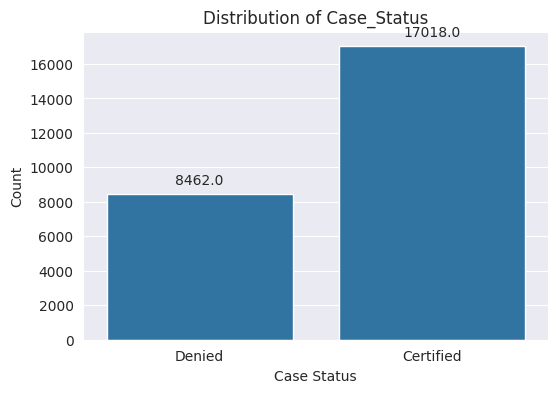

In [104]:
#To give the better aesthetics looks to plots and graph
sns.set_style('whitegrid')
sns.set_style('darkgrid')

#Now Creating the plot to visualize the data
plt.figure(figsize =(6,4))                          #To Create the plot with 6 inch width and 4 inch height
ax = sns.countplot(data = df, x = 'case_status')    #Creating the countplot for Target column
plt.title("Distribution of Case_Status")            #To creat the title
plt.xlabel("Case Status")                           #to show the xlable for plot
plt.ylabel("Count")                                 #to show the ylabel for plot

#Iterate through each columns and then show the value on each bar
for p in ax.patches:
  ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va= 'center', xytext = (0,10), textcoords = 'offset points')
plt.savefig('case_status.png')                      #This will allow to save the plot as image
plt.show()                                           #This will show the plot



##Observation from case_Status (Target Variable)
- Data shows that it is imbalanced, as 17018 cases are certifiend and 8462 are denied which roughly means 67% applicants were certified, 33% were denied. We need to take care of this imbalanced data while building the model to avoid the baised.

## Distribution of Categorical Features with Tabulary Summary


In [105]:
# List of categorical columns
cat_list = ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position']

for cols in cat_list:
  print(f'\n Distribution of {cols}')           #it will shows the columns name of the distribution
  print(df[cols].value_counts().to_markdown())  #it will show the distribution in clean and tabular format
  #print('\n')                                   #Giving some vertical space between Text Distribution and plot



 Distribution of continent
| continent     |   count |
|:--------------|--------:|
| Asia          |   16861 |
| Europe        |    3732 |
| North America |    3292 |
| South America |     852 |
| Africa        |     551 |
| Oceania       |     192 |

 Distribution of education_of_employee
| education_of_employee   |   count |
|:------------------------|--------:|
| Bachelor's              |   10234 |
| Master's                |    9634 |
| High School             |    3420 |
| Doctorate               |    2192 |

 Distribution of has_job_experience
| has_job_experience   |   count |
|:---------------------|--------:|
| Y                    |   14802 |
| N                    |   10678 |

 Distribution of requires_job_training
| requires_job_training   |   count |
|:------------------------|--------:|
| N                       |   22525 |
| Y                       |    2955 |

 Distribution of region_of_employment
| region_of_employment   |   count |
|:-----------------------|--------:

## Distribution Plot of Categorical Features


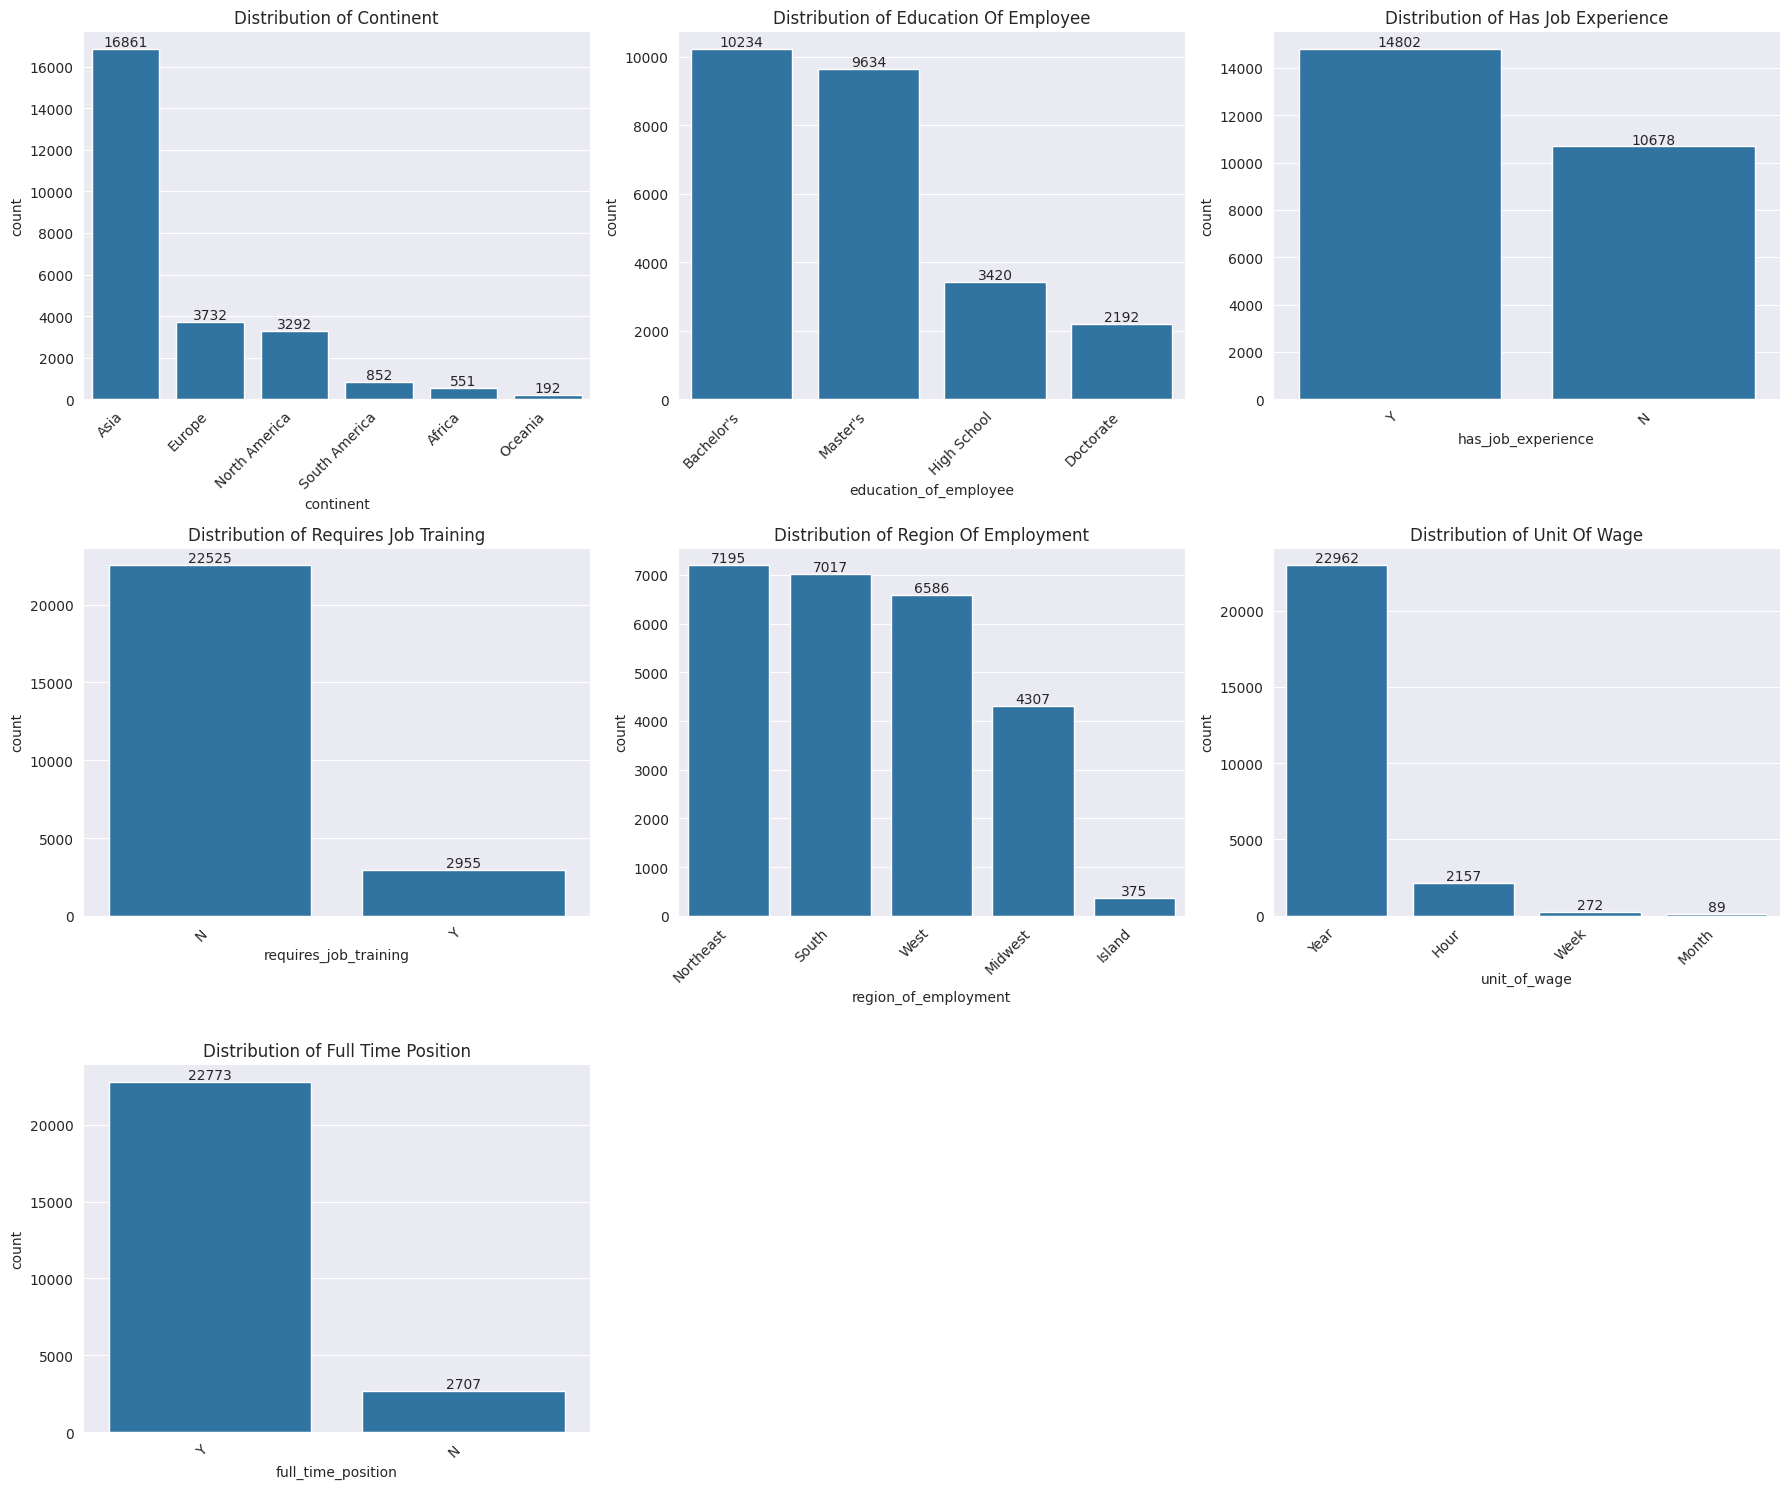

In [106]:

# Determine the number of rows and columns for the subplots
n_plots = len(cat_list)
n_cols = 3  # You can adjust the number of columns
n_rows = math.ceil(n_plots / n_cols)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 15))
axes = axes.flatten()

# Loop through the columns and create a plot for each
for i, col in enumerate(cat_list):
    # Create the countplot on the correct subplot
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    #Setting up the title of plot
    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}')


    # It wil show the value annotations on top of the bars
    for p in ax.patches:      #iteration through each bars
        ax.annotate(f'{int(p.get_height())}',     #Getting hight and width of bars
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',         #Giving the alignment for annotations
                    xytext=(0, 5),
                    textcoords='offset points')

    #Due to in-compatibility of the version giving some warning in the output.
    # This will remove the warning from the output
    tick_locations = axes[i].get_xticks()
    axes[i].set_xticks(tick_locations)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

# As there would be 9 plots would create in figure and we have 7 attributes so this line will remove the unsed plots
for j in range(i + 1, len(axes)):
    axes[j].remove()


plt.tight_layout()   #This line will adjust all the subplots so that title and label name will not overlap and it looks more appealing.
plt.show()           #This will show the plot

##Observation from Categorical Features

- **Continent** : Majority of the applicants are from Asian (16861), followed by Europe (3732) and North America(3292). Rest continents have few applicationss.  

- **Education of Employee** : Most of the applicants have Masters (9634) or Betchlor's (10234) degree and very few applicants have High School (3420) and Doctrate (2192) Degree.

- **Has Job Experience** : Experienced candidates are significantly higher (14802) compare with candidates who don't (10678) have experienced.

- **Requires Job Training** : Very few candidates (2955) required job training, remaining candidates don't need training.

- **Region of Employement** : Northeast (7195), South (7017) and West (6586) are most common regions of employement. Midwest(4307) and Island (375) has very low employment rate.

- **Unit of Wage** : Yearly wages has the highest number with (22962) and Hourly is with (2157) , Weekly (272) and monthly is with (89)

- **Full Time Position** : Most of the candidates with full time position (22773) and remaining (2707) are not Full Time position.



## Distribution of Numerical Features with Tabular Summary


In [108]:
print("Statistical Summary of Numerical Features")
print('\n')
print(df[['no_of_employees', 'yr_of_estab', 'prevailing_wage']].describe().T.to_markdown()) #it will show the distribution in clean and tabular format

Statistical Summary of Numerical Features


|                 |   count |     mean |        std |       min |     25% |     50% |    75% |    max |
|:----------------|--------:|---------:|-----------:|----------:|--------:|--------:|-------:|-------:|
| no_of_employees |   25480 |  5669.8  | 22877.4    |   12      |  1028   |  2112   |   3504 | 602069 |
| yr_of_estab     |   25480 |  1979.41 |    42.3669 | 1800      |  1976   |  1997   |   2005 |   2016 |
| prevailing_wage |   25480 | 74455.8  | 52815.9    |    2.1367 | 34015.5 | 70308.2 | 107736 | 319210 |


## Distribution Plot of Numerical Features


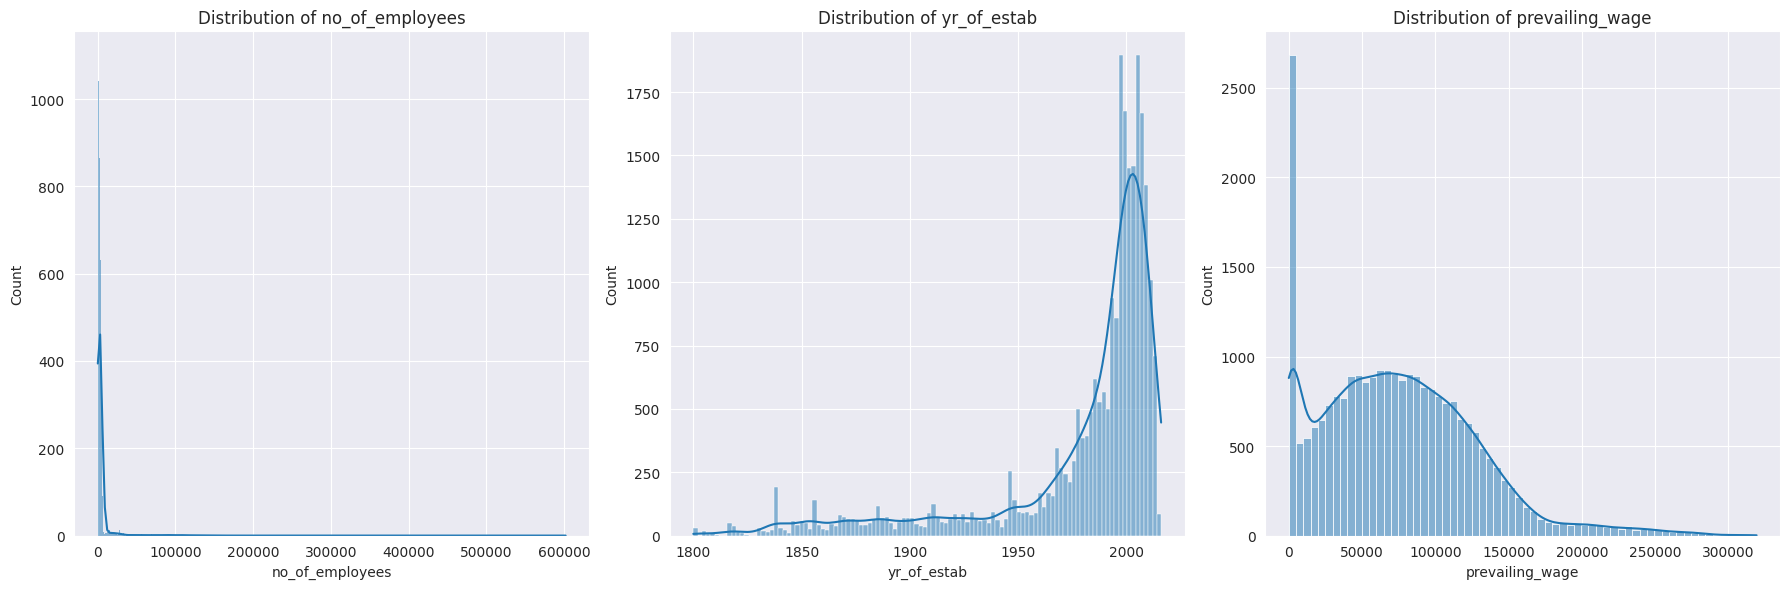

In [109]:
#Histogram of Numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))                                           #Creating the bigger plot with 18inch width and 6 inch height
for i, col in enumerate(['no_of_employees', 'yr_of_estab', 'prevailing_wage']):           #Iterating through each numerical columns
  sns.histplot(data = df, x = col, kde = True, ax = axes[i])                              #Creating the histplot
  axes[i].set_title(f'Distribution of {col}')                                             #Setting up the title for each subplot
  plt.tight_layout()                                                                      #This line will adjust all the subplots so that title and label name will not overlap and it looks more appealing.
plt.show()                                                                                #Show the plots


##Observation from Numerical Features

- **Number of Employees**: This variable is highly skewed because most of the company have less number of employees whereas some company have large number of employees.

- **Year of Establishment**: The Data spread in wide range of years from minimum 1800 to maximum 2016 and visualization shows that distribution is skewed towards the most recent years.

- **Prevailing Wage**: Majority of the applicants have lower wages and thit distribution  shows highly skewed to right.

#Bivariate Analysis

## Categorical Features Vs Case Status

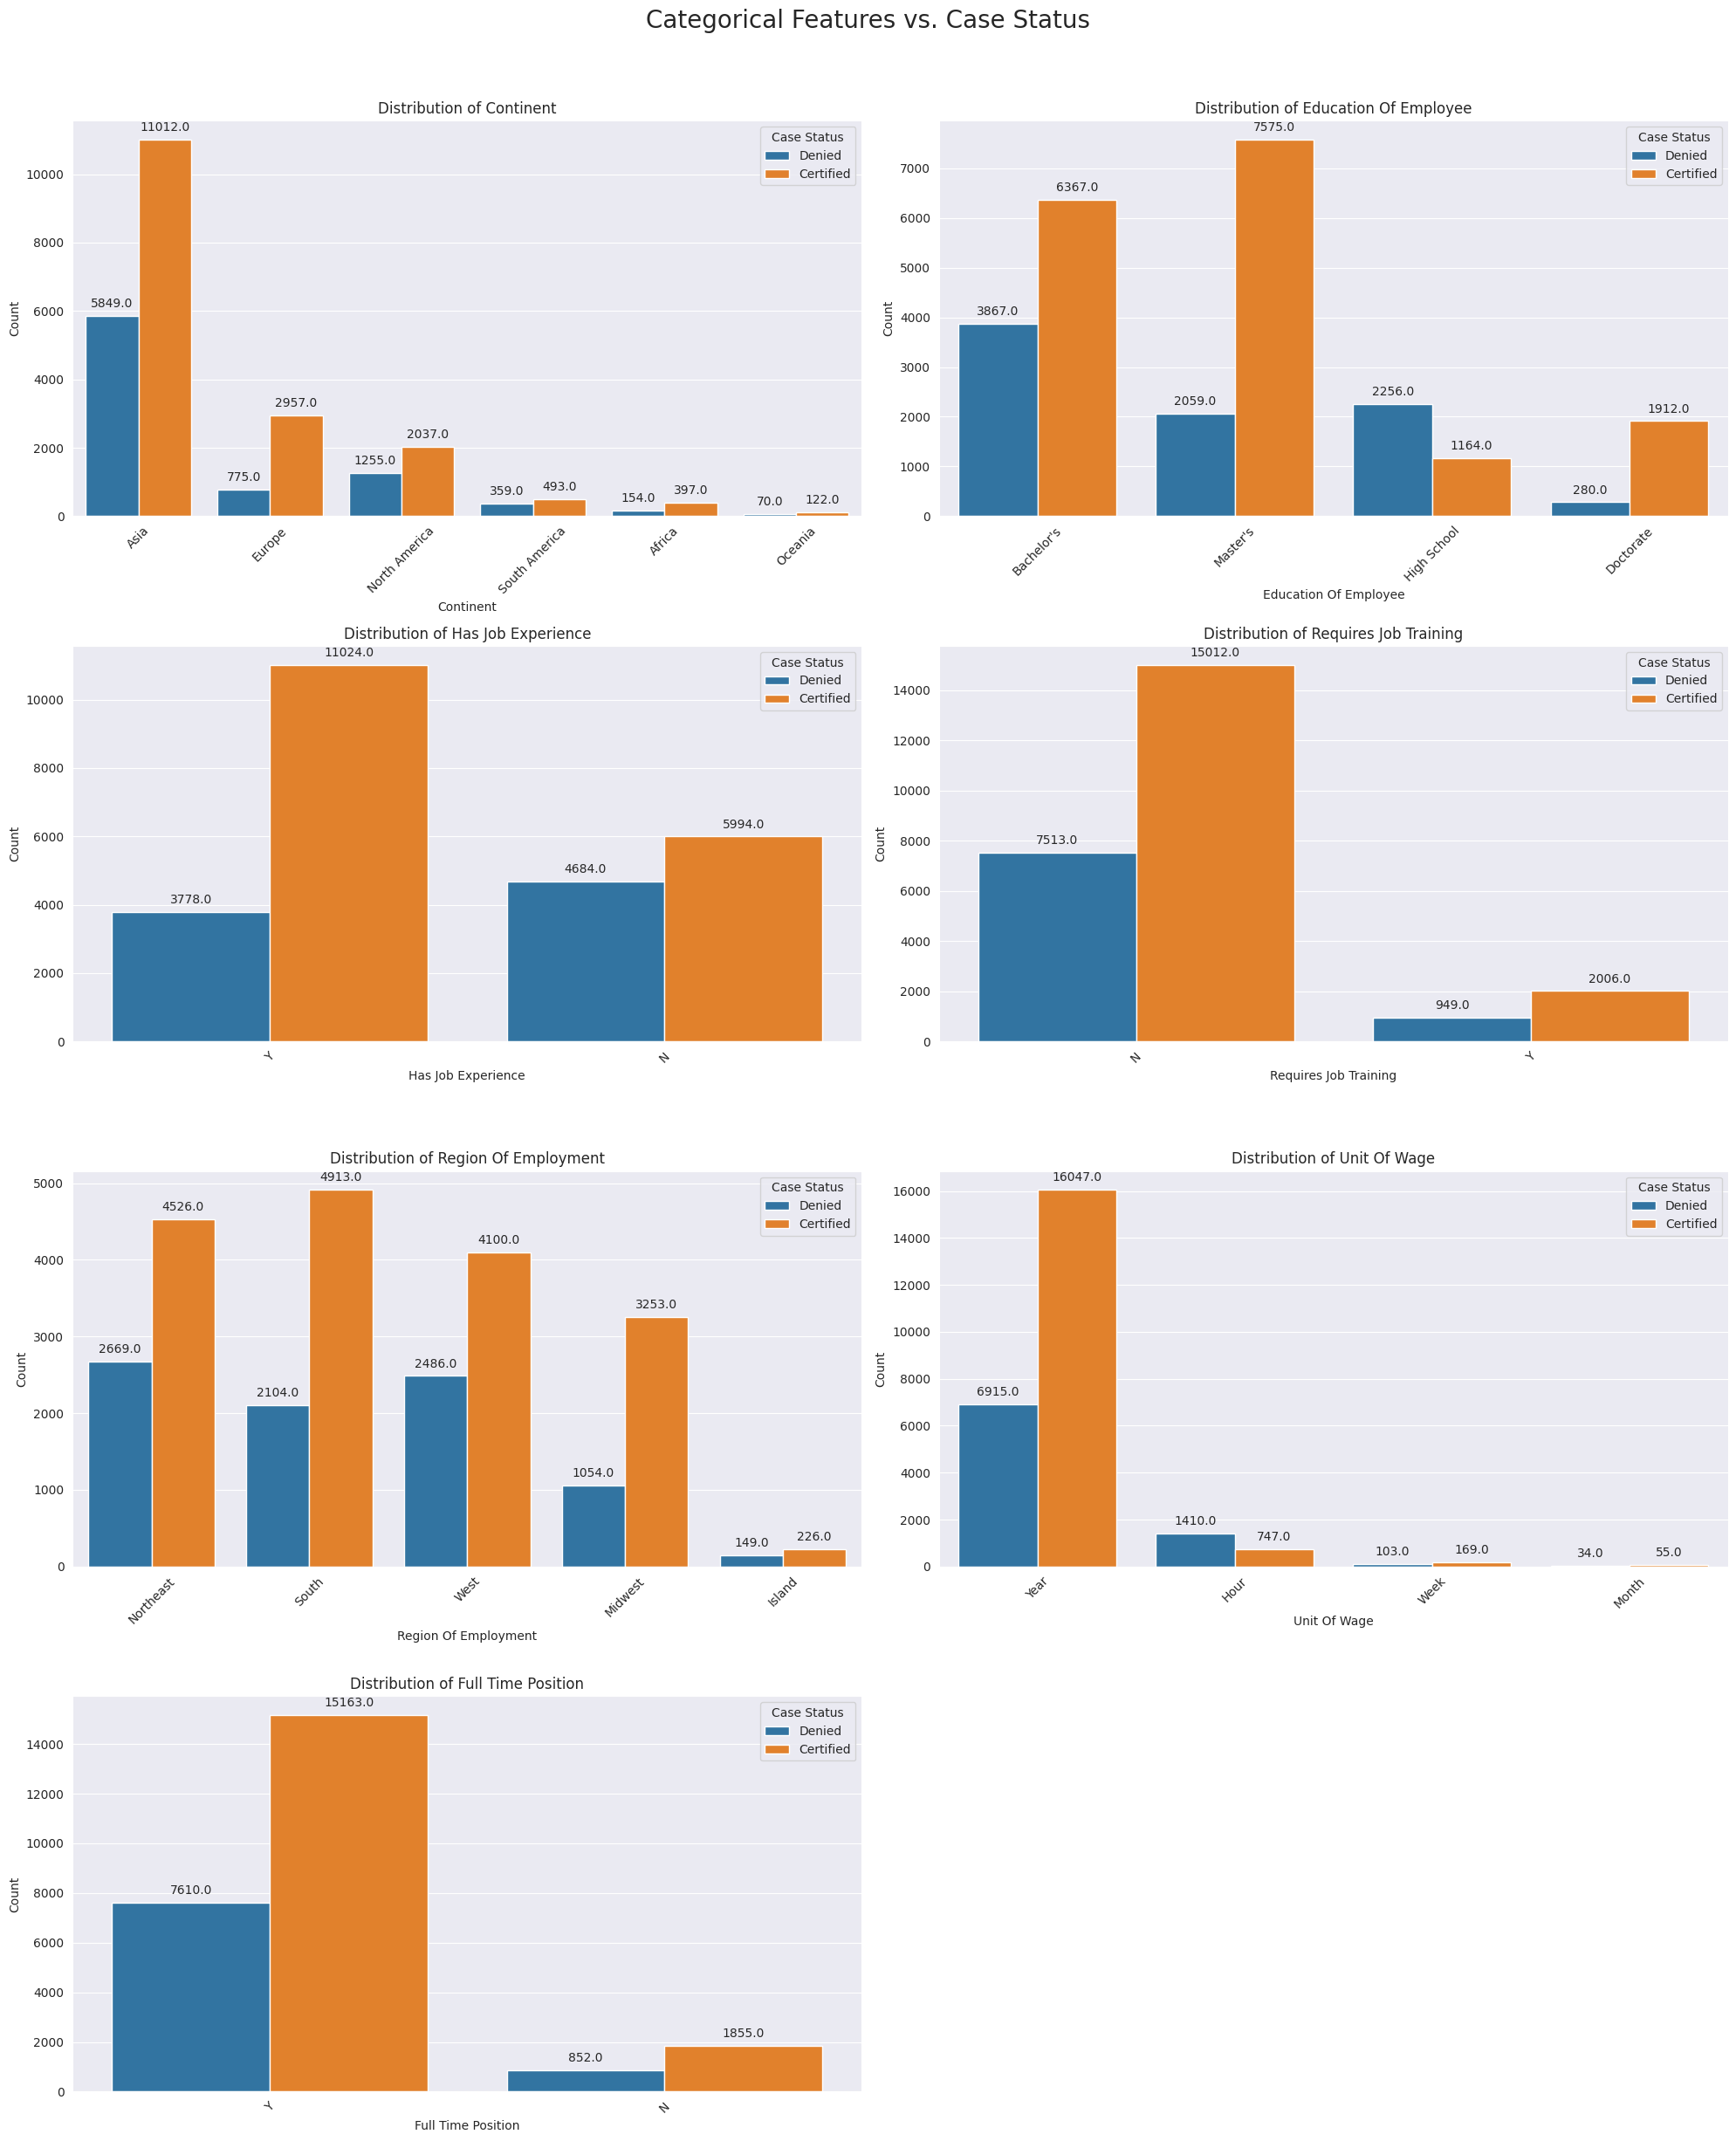

In [110]:
# Calculate the number of rows and columns for the subplots
n_cols = 2
n_rows = (len(cat_list) + n_cols - 1) // n_cols

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))                                #Creating the bigger plot with 18inch width and 6 inch height
fig.suptitle('Categorical Features vs. Case Status', fontsize=20, y=1.02)                         #Setting up the title for bigger plot
axes = axes.flatten()                                                                             #Converting 2D into 1D to create iterate over each plot

# Loop through the columns and plot on each subplot
for i, colss in enumerate(cat_list):                                                              #Iterating through each columns
    ax = axes[i]                                                                                  #Getting the current subplot
    sns.countplot(data=df, x=colss, hue='case_status', ax=ax, order=df[colss].value_counts().index) #Creatin subplot for each column
    ax.set_title(f"Distribution of {colss.replace('_', ' ').title()}")                              #setting up the title name of each columns
    ax.set_xlabel(colss.replace('_', ' ').title())                                                  #Setting up the name of Xlable
    ax.set_ylabel("Count")                                                                          #Settign up the name of ylable
    ax.tick_params(axis='x', rotation=45)                                                           #Setting the alignment of lables
    ax.legend(title='Case Status')                                                                  #Setting up the legend



    for p in ax.patches:                                                                            #iteration through each bars
      height = p.get_height()                                                                       #It wil pull the bar height
      if height > 0:                                                                                #Applying condition to show the height or bars
        ax.annotate(f"{height}", (p.get_x() + p.get_width() / 2., height),                          #Setting up the alignment of labeles on bars
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# As there would be 9 plots would create in figure and we have 7 attributes so this line will remove the unsed plots
for i in range(len(cat_list), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()                                                                                  #This line will adjust all the subplots so that title and label name will not overlap and it looks more appealing.
plt.show()                                                                                          #Show the plots

##Observation: Categorical Features Vs Case Status

- **Continent**: Application belong to Asian have the highest number of Visa approval and rejection which is obvious because it has the largest number of participants. When it comes to success rate of approval then Europe is winning here.  
  - African and Oceania have very less number of application.


- **Education**: Candidates with Master's and Betchlor's degree have high number of approval for Visa comapred with high school and Doctrate Degree.
  - Doctorate degree holder have higher sucess rate of visa approval although they have less number of application however their sucess rate is so high.


- **Job Experience**: Job Experience column has direct impact on visa approval .Experienced candidates have higher chances of visa approval it is also showing in the distribution as well.
  - There is possible that visa would get reject for those who don't have work experience which indicates that company needs foriegn worker who can start working immediately.


- **Job Training**: There are chances of denied for the applicants who required he job training. Distribtution shows that high chances of visa approval who don't required job training.

- **Region of Employement**: Most application are belong to NorthWest, South and West region. Overall certified cases are higher compare then denied case in all the region.
  - Island and Southwest has very less number of application which indicates job or foreign workers are not needed in those location  


- **Unit of Wages**: Most of the Applicants are from yearly wages thats why approval and rejection both numbers are high in yearly wages. There are high chances to get approved for yearly wages applicants.  
    - Hourly and Weekly have very high number of denied cases so we can say that chances to get reject of those people with Hourly and Weekly wages.


- **Full Time Position**: Most of the Applicants got the Visa approval and they are full time employee. Although this feature may not be relevent for our model.


  


## Numerical features Vs Case_status using KDE Plots

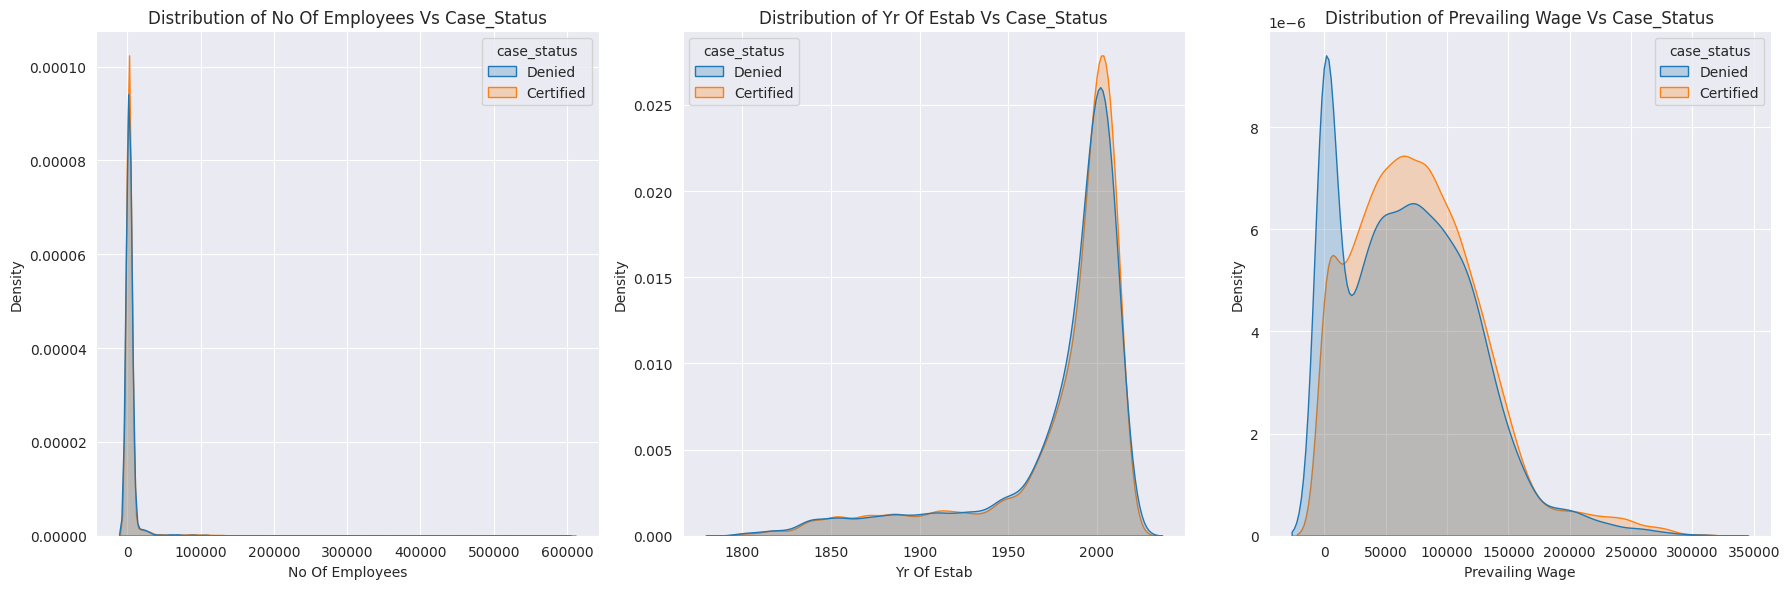

In [111]:
#KDE Plots for Numerical columns vs Case status
fig, axes = plt.subplots(1, 3, figsize=(18, 6))                                           #Creating the bigger plot with 18inch width and 6 inch height
for i, col in enumerate(['no_of_employees', 'yr_of_estab', 'prevailing_wage']):           #Iterating through each numerical columns
  sns.kdeplot(data = df, x = col, hue = 'case_status', fill = True, common_norm= False, ax = axes[i]) #Creating the KDE Plots
  axes[i].set_title(f"Distribution of {col.replace('_',' ').title()} Vs Case_Status")     #Setting up the title for each subplot
  axes[i].set_xlabel(f"{col.replace('_',' ').title()}")                                   #Setting up the name for Xlabel
  axes[i].set_ylabel("Density")                                                           #Setting up the name for ylabel
  plt.tight_layout()                                                                      #This line will adjust all the subplots so that title and label name will not overlap and it looks more appealing.
plt.show()                                                                                #Show the plots


## Numerical features Vs Case_status using *boxplots*

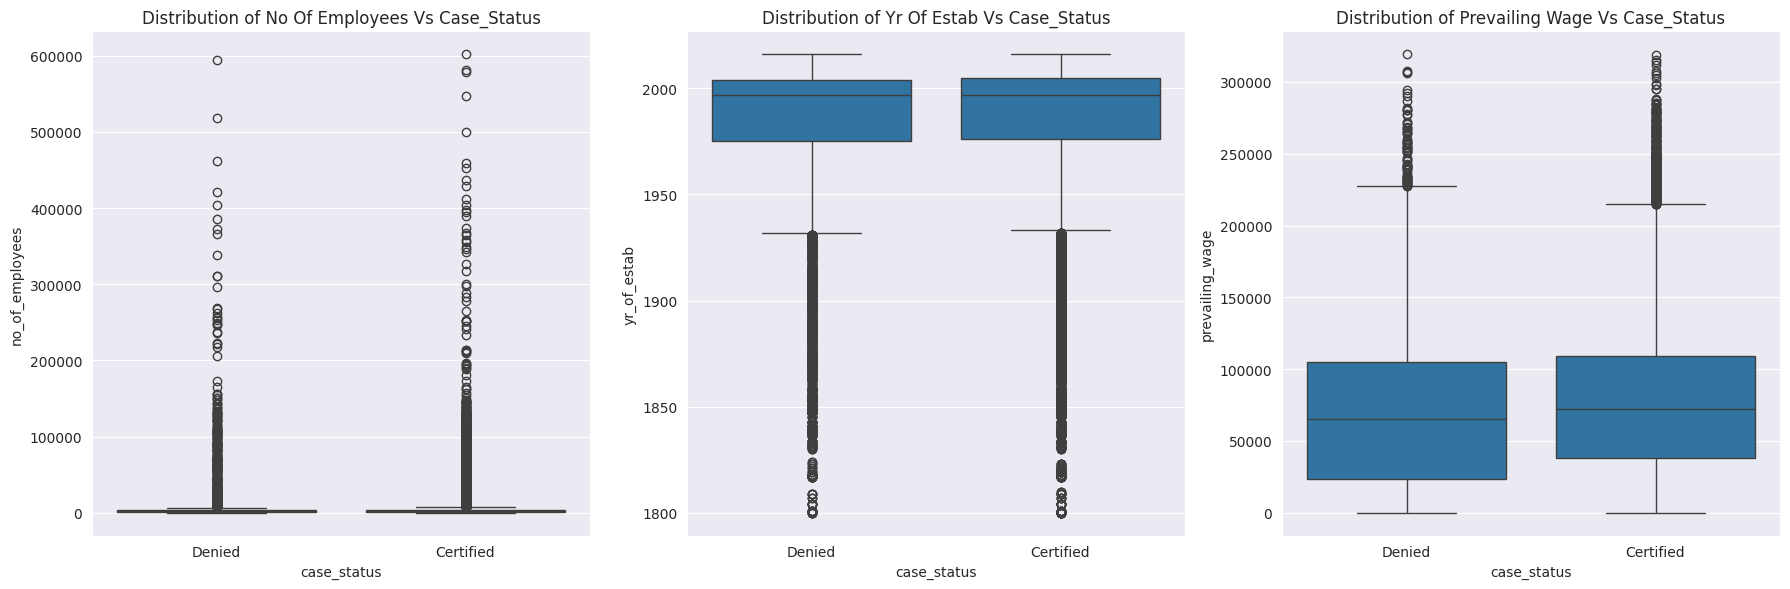

In [112]:
#Boxplot for Numerical columns vs Case status
fig, axes = plt.subplots(1, 3, figsize=(18, 6))                                           #Creating the bigger plot with 18inch width and 6 inch height
for i, col in enumerate(['no_of_employees', 'yr_of_estab', 'prevailing_wage']):           #Iterating through each numerical columns
  sns.boxplot(data = df, y = col, x = 'case_status', ax = axes[i])                        #Creating the histplot
  axes[i].set_title(f"Distribution of {col.replace('_',' ').title()} Vs Case_Status")     #Setting up the title for each subplot
  plt.tight_layout()                                                                      #This line will adjust all the subplots so that title and label name will not overlap and it looks more appealing.
plt.show()                                                                                #Show the plots


##Observation for Numerical features Vs Case_status

- **Number of Employees Vs. Case Status**: Certified cases are much higher then denied cases considering the fact certified applicants are belong from the bigger size company which means median sized company (Having larget employees) have better chance to get visa approval.
  - There are big number of Outliers are both side Certified and Denied.

- **Yr_of_estab Vs. Case Status**: Year of Establishment has not much impact on visa approval or rejection status. Median are the almost same in both (Certified and Denied).
  - This indicates that It doesn't matter if the company is how much old or new, it wouldn't have any impact of visa approval or rejection.

- **Prevailing Wages Vs. Case Status**: It is very important features as the median of certified status is larget compare than denied status. It indicates that high prevailing wages have higher chances to get visa approval.
  - Prevailing wages is the key drive for visa approval status.
  

# Correlation Matrix Analysis

- We have made the correlation Matrix only on the Numerical columns because correlation is the relationship between two columns mathematically.
  - Technically there is formula used to take out the correlation which is called pearson correlation cofficient and that formula needs numerical value to calculate the correlation.

In [113]:
numerical_columns = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']         #List of NumericaL columns
df_numerical = df[numerical_columns]                                              #Creating the Dataframe for numerical columns

Correlation_Matrix = df_numerical.corr()                                          #computing the correlation between variables
print(Correlation_Matrix.to_markdown())                                            #Showing the correlation matrix in tabular format


|                 |   no_of_employees |   yr_of_estab |   prevailing_wage |
|:----------------|------------------:|--------------:|------------------:|
| no_of_employees |        1          |    -0.0177369 |       -0.00954466 |
| yr_of_estab     |       -0.0177369  |     1         |        0.0123418  |
| prevailing_wage |       -0.00954466 |     0.0123418 |        1          |


#Correlation Matrix Plot

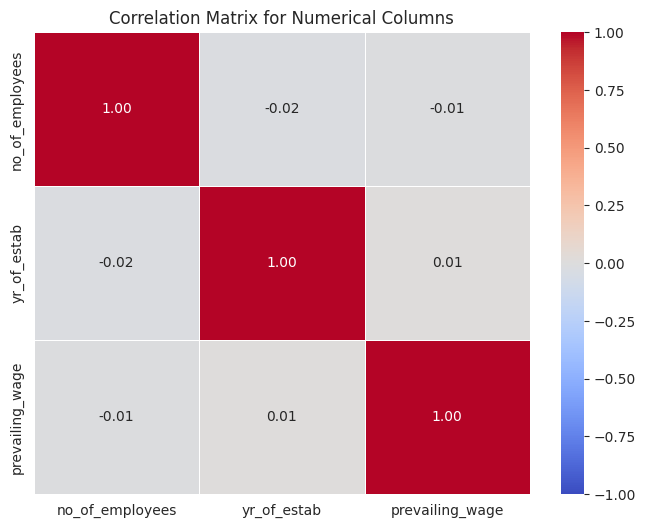

In [114]:
plt.figure(figsize = (8, 6))                                                     #Creating the plot with 8 inch width and 6 inch height
sns.heatmap(Correlation_Matrix, annot = True, cmap = 'coolwarm', linewidths= 0.5, fmt = '.2f', vmin = -1, vmax = 1)   #Creating the Correlation Matrix
plt.title('Correlation Matrix for Numerical Columns')                                                                 #Setting up the Title of Correlation Matrix
plt.show()                                                                                                            #Showing the plot

##Observation from Correlation Matrix

- **yr_of_establishment and no_of_employees** : Relationship between these two features are very low that even touched to negative (-0.02), which indicates that number of employees in the company and the year of establishment has no strong relation.  

- **prevailing_wage and no_of_employees** : Relationship with `prevailing_wage` is same like `yr_of_establishment`which is (-0.01). Which also indicates that number of employees in the company and the year of establishment has no strong relation.  

- **prevailing wage and yr_of_establishments** : Relationship between prevailing wage and yr_of_establishments are almost zero which is actually (0.01) which indicates how much old the company is nothing to do with how much wagegs applicants are getting.

## Summary

- Key features for Visa Approval seem to be case_status, education_of_employees, prevailing_wages, has_job_experience.

- In correlation Matrix we have found there is no significant relation between numerical features all the variables are independent and they don't affect to each other.

- We have noticed the skewness and data also imbalanced which we need to treat before building the model.

#Criteria 2

##Data Pre-processing

- We have already taken care of missing and negative imputation before EDA.

In [115]:
#checking the missing values
print(df.isnull().sum().to_markdown())

|                       |   0 |
|:----------------------|----:|
| case_id               |   0 |
| continent             |   0 |
| education_of_employee |   0 |
| has_job_experience    |   0 |
| requires_job_training |   0 |
| no_of_employees       |   0 |
| yr_of_estab           |   0 |
| region_of_employment  |   0 |
| prevailing_wage       |   0 |
| unit_of_wage          |   0 |
| full_time_position    |   0 |
| case_status           |   0 |


## Checking the Duplicacy of data


In [116]:
#Checking the duplicated data
df.duplicated().value_counts()

,count
False,25480


- The Output confirms that are not missing values or duplicated values

## Outlier Detection and Treatment

- While doing the EDA we have found that the numerical columns yr_of_estab, no_of_employees and prevailing wages have so many outliers, speicially in two columns `prevailing_age and no_of_employees1` because their skewed distribution.
- Outliers can negatively effect to a machine learning model performance that's why we need to take care of those.

- I will use Interquartile Range (IQR) method to handle the outliers. This method make the model more robust and it works well with skewed data.

- My approach would be to `cap` the outliers which means we will replace the value with lower or upper boundry.

##Treatment of outliers using IQR Method

In [117]:
numerical_columns = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

for col in numerical_columns:                               #Iterate through each columns
  Q1 = df[col].quantile(0.25)                               #Computing the Q1
  Q3 = df[col].quantile(0.75)                               #Computing the Q3

  IQR = Q3-Q1                                               #Computing the IQR

  #Defining the lowerbound and upperbound for outliers
  lower_bound = Q1 - 1.5 * IQR                              #Computing the lower bound
  upper_bound = Q3 + 1.5 * IQR                              #Computing the upper bound

  #capping the outliers
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])     #
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])




In [118]:
print(df[numerical_columns].describe().T.to_markdown())

|                 |   count |     mean |        std |       min |     25% |     50% |    75% |    max |
|:----------------|--------:|---------:|-----------:|----------:|--------:|--------:|-------:|-------:|
| no_of_employees |   25480 |  2497.2  |  1870.97   |   12      |  1028   |  2112   |   3504 |   7218 |
| yr_of_estab     |   25480 |  1985.96 |    25.8132 | 1932.5    |  1976   |  1997   |   2005 |   2016 |
| prevailing_wage |   25480 | 73961.4  | 51229.3    |    2.1367 | 34015.5 | 70308.2 | 107736 | 218316 |


#Outler Analysis after Treatment

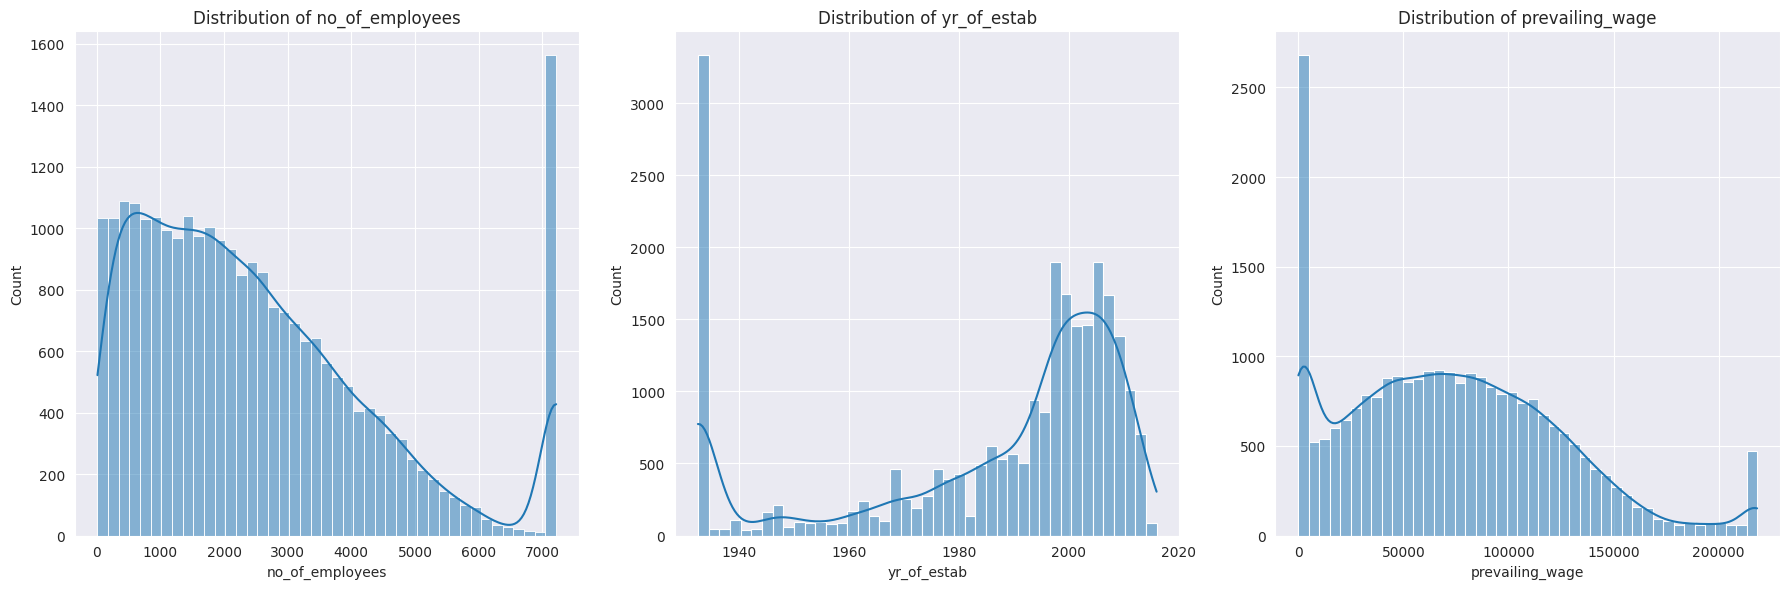

In [119]:
#Histogram of Numerical features after the Outlier Treatment
fig, axes = plt.subplots(1, 3, figsize=(18, 6))                                           #Creating the bigger plot with 18inch width and 6 inch height
for i, col in enumerate(['no_of_employees', 'yr_of_estab', 'prevailing_wage']):           #Iterating through each numerical columns
  sns.histplot(data = df, x = col, kde = True, ax = axes[i])                              #Creating the histplot
  axes[i].set_title(f'Distribution of {col}')                                             #Setting up the title for each subplot
  plt.tight_layout()                                                                      #This line will adjust all the subplots so that title and label name will not overlap and it looks more appealing.
plt.show()                                                                                #Show the plots


## Observation after outlier Treatment

 - **no_of_employees**: After the outlier treatment no_of_employees columns has been changed completely. Earlier the maximum value was `602069` which has been changed to `7218` now the data looks less spread and more realistic and stable.


- **yr_of_estab**: We have capped the outlier which were belong to too old years. After doing this now the min year has changed from `1800 to 1932` now the distribution looks normal.

- **Prevailing_wage**: Earlier it was totally right skewed however now skewness has been reduced and it's maximum value has been decreased from `319210 to 218316` which is good for model now.


##Creating the Boxplot after the outlier Treatment

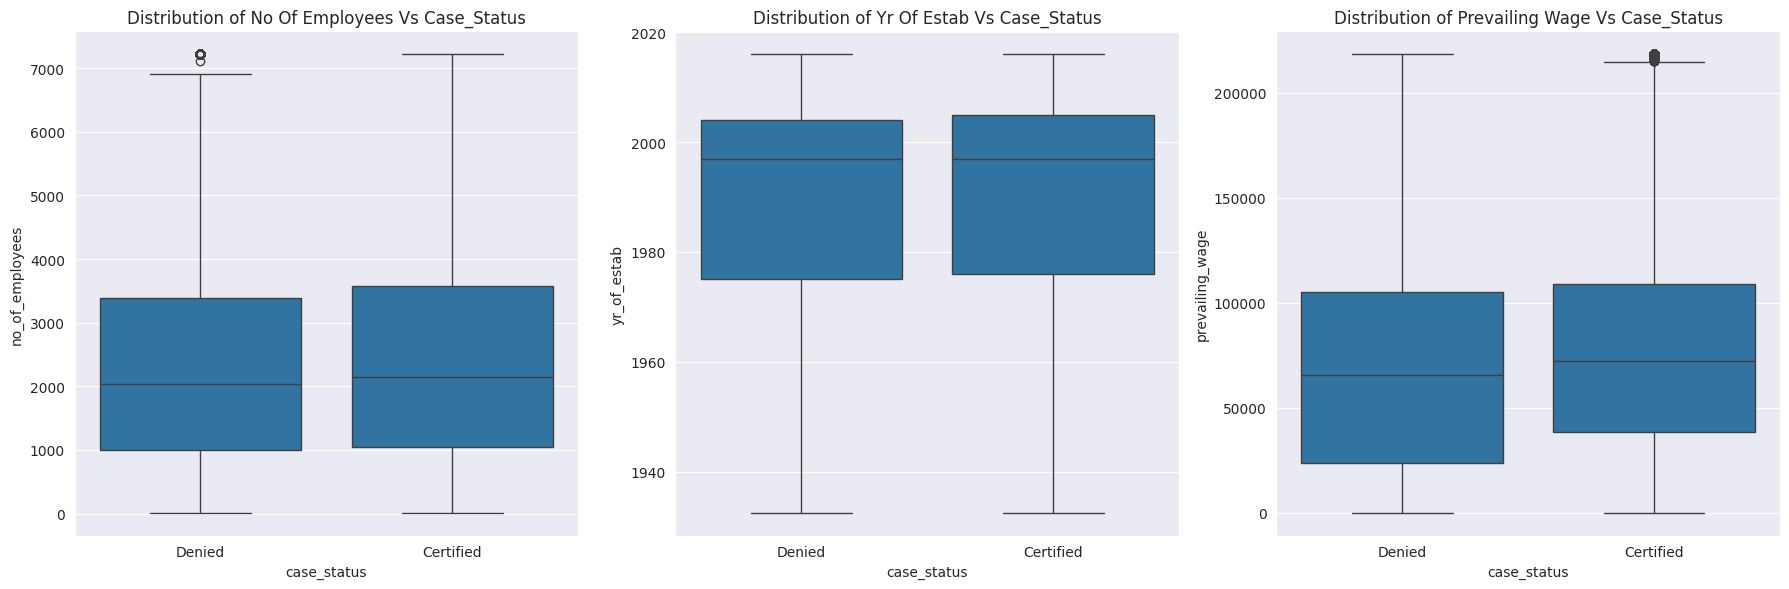

In [120]:
#Boxplot for Numerical columns vs Case status
fig, axes = plt.subplots(1, 3, figsize=(18, 6))                                           #Creating the bigger plot with 18inch width and 6 inch height
for i, col in enumerate(['no_of_employees', 'yr_of_estab', 'prevailing_wage']):           #Iterating through each numerical columns
  sns.boxplot(data = df, y = col, x = 'case_status', ax = axes[i])                        #Creating the histplot
  axes[i].set_title(f"Distribution of {col.replace('_',' ').title()} Vs Case_Status")     #Setting up the title for each subplot
  plt.tight_layout()                                                                      #This line will adjust all the subplots so that title and label name will not overlap and it looks more appealing.
plt.show()                                                                                #Show the plots


## Observation for Boxplot after outlier Treatment

- **no_of_employees** : There were so many outliers earlier after the treatment all the outliers have been capped under the box and whiskers, which means this column is more stable now.

- **yr_or_estab** : Earlier there were many outliers in this features as well hwoever they are controlled in small range now which is great to get better performance of model.

- **prevailing_wage** : It had so many outliers however they are now  capped perfectly, which help the model to catch the patterns.

- Overall ourbox plot confirmed that our treatment strategy (IQR capping)worked, it has cleaned the data and ready the features for data modeling.

## Why did we use this approach (IQR Capped):
- We have used this method because it does not remove he outliers, this method capped those outliers by doing this our data size would remain the same and our model can train on all the data.
  - If we would have deleted the outliers then we lost the infomation as well.

# Feature Engineering

## Step 1: Feature Engineering- Standardize to 'prevailing_wage

In [121]:
def convert_to_yearly_wage(row):
  if row['unit_of_wage'] == 'Hour':
    return row['prevailing_wage']* 8 * 260  #8 Working hours per day and 260 working days per year
  elif row['unit_of_wage'] == 'Week':
    return row['prevailing_wage']*52       #There are 52 working weeks per year
  elif row['unit_of_wage'] == 'Month':
    return row['prevailing_wage'] * 12      #There are 12 months per year
  else:
    return row['prevailing_wage']

df['prevailing_wage_yearly'] = df.apply(convert_to_yearly_wage, axis = 1)



## Step 2: Feature Engineering -'Age of the Company'

In [122]:
df['age_of_company'] =2025 - df['yr_of_estab']

## Step 3: Feature Engineering- Log Tranform 'Prevailing Wage yearly'

In [123]:
df['prevailing_wage_yearly_log'] = np.log(df['prevailing_wage_yearly'])


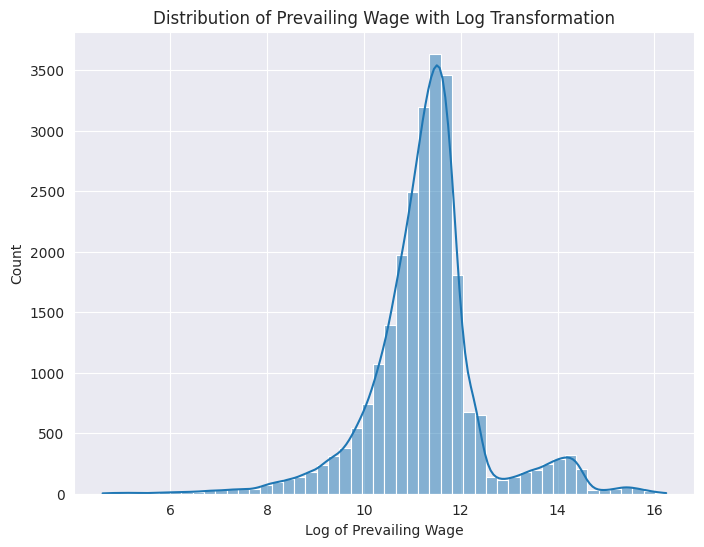

In [124]:
plt.figure(figsize =(8,6))
sns.histplot(data = df['prevailing_wage_yearly_log'], bins =50, kde= True)
plt.title('Distribution of Prevailing Wage with Log Transformation')
plt.xlabel('Log of Prevailing Wage')
plt.ylabel('Count')
plt.show()

## Insights and Rationale for Feature Engineering


- **prevailing_wage_yearly_log (Created New Feature)** : In the original dataset of old column of prevailing_wage the data were in different unit like hourly, weekly and yearly it would be hard to interepret for the machine learning model.
  - We have standardize those units into single unit called yearly as per the following logic:
            - 8 Working hours per day and 260 working days per year (Hourly) so Multiply by 2080
            - There are 52 working weeks per year (Weekly) so Multiply by 52
            - There are 12 months per year(Monthly) so Multiply by 12

  - By doing this our model would be train on single consistent scale, which is important for model accuracy. <br><br>



- **Age of the Company (Created New Feature)** : In the old column (yr_of_estab) the model would not able to catch the patter better with the values like "2005" or "1997" so we have to convert the value in age of the company which would be meaningful for the model because the model would clearly understand how old the company is and it may have bigger impact on visa approval.<br><br>



- **prevailing_wage_log (Log Transformation)** : As we have seen in the EDA the distribution of prevaling_wage was right skewed (majority of the values were in low range  and there were many outliers as well). Generally trained model on such data don't perform well.
  - That's why we have applied the log transformation. This is the mathematical technique which makes skewed distribution closer to normal distribution(Bell shape curved). Machine learning model like Linear regression perform well when they trained on normal distributed data because they are designed to handle the normal distribution data.  

##Verify the new features

In [125]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_yearly,age_of_company,prevailing_wage_yearly_log
0,EZYV01,Asia,High School,N,N,7218.0,2007.0,West,592.2029,Hour,Y,Denied,1231782.032,18.0,14.023972
1,EZYV02,Asia,Master's,Y,N,2412.0,2002.0,Northeast,83425.6500,Year,Y,Certified,83425.650,23.0,11.331711
2,EZYV03,Asia,Bachelor's,N,Y,7218.0,2008.0,West,122996.8600,Year,Y,Denied,122996.860,17.0,11.719914
3,EZYV04,Asia,Bachelor's,N,N,98.0,1932.5,West,83434.0300,Year,Y,Denied,83434.030,92.5,11.331812
4,EZYV05,Africa,Master's,Y,N,1082.0,2005.0,South,149907.3900,Year,Y,Certified,149907.390,20.0,11.917773


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   case_id                     25480 non-null  object 
 1   continent                   25480 non-null  object 
 2   education_of_employee       25480 non-null  object 
 3   has_job_experience          25480 non-null  object 
 4   requires_job_training       25480 non-null  object 
 5   no_of_employees             25480 non-null  float64
 6   yr_of_estab                 25480 non-null  float64
 7   region_of_employment        25480 non-null  object 
 8   prevailing_wage             25480 non-null  float64
 9   unit_of_wage                25480 non-null  object 
 10  full_time_position          25480 non-null  object 
 11  case_status                 25480 non-null  object 
 12  prevailing_wage_yearly      25480 non-null  float64
 13  age_of_company              254

## Feature Selection

##Reason for removing the unecessary columns from the data

- **Redundancy**: prevailing_wage_year and prevailing_wage have same informaiton in different form.

- **Multicollinearity**: When two features are strongly correlated just like in these columns age_of_company and yr_of_estab then model get confunsed which leads the problem of multicollinearity through which the model performance get unstable.

- **Model complexity**: With so many features model takes too much time in training process also which lead the overfitting the model. When the model gets overfit, it perform well on training set however it worst on unseen data.

- Following are the columns we will remove it.
      - Removing the unit_of_wage and prevailing_wage instead we will use `prevailing_wage_log` which is more stable and informative.
      - Removing the yr_of_estab and will use age_of_company which is more meaningful and new feature.
      - case_id is also not playing any role in visa approval or rejection status so removing this too.


In [127]:
columns_to_drop = ['prevailing_wage', 'unit_of_wage', 'prevailing_wage_yearly', 'yr_of_estab', 'case_id']
df = df.drop(columns= columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   continent                   25480 non-null  object 
 1   education_of_employee       25480 non-null  object 
 2   has_job_experience          25480 non-null  object 
 3   requires_job_training       25480 non-null  object 
 4   no_of_employees             25480 non-null  float64
 5   region_of_employment        25480 non-null  object 
 6   full_time_position          25480 non-null  object 
 7   case_status                 25480 non-null  object 
 8   age_of_company              25480 non-null  float64
 9   prevailing_wage_yearly_log  25480 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.9+ MB


## We can see that above discussed unecessary columns has been removed

#Prepare data for modeling

## Applying OneHotEncoding to categorical features

- Machine learning model interpret the numbers only that's why we need to convert the categorical columns into numerical and this process called OneHotEncoding.
  - This process creates new columns for every category in the columns.

In [128]:
#list of Categorical features
cat_list = ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'full_time_position']

#applying onehot encoding
encoded_df = pd.get_dummies(data= df, columns= cat_list, drop_first = True)

#Showing the encoded dataframe in tabular format
print(encoded_df.head().to_markdown(index= False, numalign = 'left', stralign = 'left'))

| no_of_employees   | case_status   | age_of_company   | prevailing_wage_yearly_log   | continent_Asia   | continent_Europe   | continent_North America   | continent_Oceania   | continent_South America   | education_of_employee_Doctorate   | education_of_employee_High School   | education_of_employee_Master's   | has_job_experience_Y   | requires_job_training_Y   | region_of_employment_Midwest   | region_of_employment_Northeast   | region_of_employment_South   | region_of_employment_West   | full_time_position_Y   |
|:------------------|:--------------|:-----------------|:-----------------------------|:-----------------|:-------------------|:--------------------------|:--------------------|:--------------------------|:----------------------------------|:------------------------------------|:---------------------------------|:-----------------------|:--------------------------|:-------------------------------|:---------------------------------|:-----------------------------|:-----------

### This output confirmed that we have applied the OneHotEncoding on categorical columns sucessfully.

#Criteria 3

##Model Building

##Defining the (Independent Expalanatory and Dependent Variable)

In [129]:
#Definingthe X and y
X = encoded_df.drop('case_status', axis =1)
y = encoded_df['case_status']

## encoding the target variable for numerical value

In [130]:
y_numeric = y.map({'Denied' :0, 'Certified' :1})

#Splitting the dataset

In [131]:
X_train, X_test, y_train, y_test = train_test_split(
    X,                                          #Explanatory/Independent Variable
    y_numeric,                                  #Dependent/ Target Variable
    test_size = 0.3,                            #Allocating the test size (Giving 70% data to train the model is enough)
    random_state = 42,                          #Set the randomness to enable the reproducibility
    stratify = y_numeric                        #Set the randomness to enable the reproducibility in the target variable
)

## Checking the size of the different sets

In [132]:
print(f"\nSize of X is : {X.shape}")
print(f"\nSize of y is :{y.shape}")
print(f"\nX_train size is : {X_train.shape}")
print(f"\nX_test size is : {X_test.shape}")
print(f"\ny_train size is : {y_train.shape}")
print(f"\ny_test size is : {y_test.shape}")



Size of X is : (25480, 18)

Size of y is :(25480,)

X_train size is : (17836, 18)

X_test size is : (7644, 18)

y_train size is : (17836,)

y_test size is : (7644,)


## Observation:
- **Size of X** : There are 25480 rows and 18 columns in the total dataset on which are going to make the model.
- **Size of y** : Target variabel (y) has 25480 records and every records represents the visa status of particular candidates.
- **Size of X_train** : There are 17836 rows  and 18 columns. This is the data on which our model would be trained. This is the 70% of total data (25840* 0.7)

- **Size of X_test** : There 7644 rows and 18 columns and this is the data on which our model would test in the end. This is the 30% of total data (25840 * 0.3)

- **Size of y_train** : There are 17836 rows in this set and it tells to model that how many actual certified or denied cases.

- **Size of y_test** : There are 7644 records in this set. When the model make prediction on X_test then it would be comapare by y_test.

##First 5 rows of Independent Variable (X) in tabular format

In [133]:

#first 5 rows of X
print('First 5 records of X (Independent Variable) ')
print(X.head().to_markdown(index = False, numalign = 'left', stralign= 'left' ))

print(' ')

#first 5 rows of y
print("First 5 Records of Target (y) variable")
print(y.head().to_markdown(index= False, numalign= 'left', stralign= 'left'))

First 5 records of X (Independent Variable) 
| no_of_employees   | age_of_company   | prevailing_wage_yearly_log   | continent_Asia   | continent_Europe   | continent_North America   | continent_Oceania   | continent_South America   | education_of_employee_Doctorate   | education_of_employee_High School   | education_of_employee_Master's   | has_job_experience_Y   | requires_job_training_Y   | region_of_employment_Midwest   | region_of_employment_Northeast   | region_of_employment_South   | region_of_employment_West   | full_time_position_Y   |
|:------------------|:-----------------|:-----------------------------|:-----------------|:-------------------|:--------------------------|:--------------------|:--------------------------|:----------------------------------|:------------------------------------|:---------------------------------|:-----------------------|:--------------------------|:-------------------------------|:---------------------------------|:-----------------------------

#Model 1 (Decision Tree model)

## Why DecisionTree Model:
 - It is very basic and easy to understand model even it's provide a startting baseline. This model gives us the insight that how complex our data is and how any particular model can peform better.


## Building and Training the Decision Tree model

In [134]:
#Instance creation of Decision Tree model
dtree = DecisionTreeClassifier(random_state =42)

#fitting the model
dtree.fit(X_train, y_train)

#Making the prediction
y_pred = dtree.predict(X_test)

## Evaluate the Model

In [135]:
#get the accuracy score
accuracy = accuracy_score(y_test, y_pred)

#get the f1_score
f1 = f1_score(y_test, y_pred)

#get the report from classificatin report
combined_report = classification_report(y_test, y_pred, target_names = ['Denied', 'Certified'])

##Printing the Result

In [136]:
print("Decision Tree Classifer Performance")
print(f"Accuracy: {accuracy :.4f}")
print(f"F1 Score {f1 :.4f}")
print(' ')
print("Classification Report")
print(combined_report)

Decision Tree Classifer Performance
Accuracy: 0.6497
F1 Score 0.7357
 
Classification Report
              precision    recall  f1-score   support

      Denied       0.47      0.49      0.48      2539
   Certified       0.74      0.73      0.74      5105

    accuracy                           0.65      7644
   macro avg       0.61      0.61      0.61      7644
weighted avg       0.65      0.65      0.65      7644



##Observation


- **Accuracy_Score**: Model overall accuracy is 64% which is just fine and it indicates that our model prediction is 64% correct.

- **F1 Score**: F1 Score is the avearage of recall and precision score and it is considered as realible option specially for the imbalanced dataset.
      - Certified cases : 74%
      - Denied Cases : 48%

- **Recall & Precision Score**: Denied cases are low which means model is not performing well on prediction of denied cases.
      - Recall is 49% and Precision is 47% for Denied Cases
      - Recall is 73% and Precision is 74% for Certified Cases

- As the recall for certified cases is 73% which means model is able to predict 73% certified cases out of total Truly certified.

- Overall model is performing just fine for the certified cases however it is less effective for the Denied cases. it is because of imbalanced Data.

## Confusion matrix for both Train and Test Data on Original Dataset

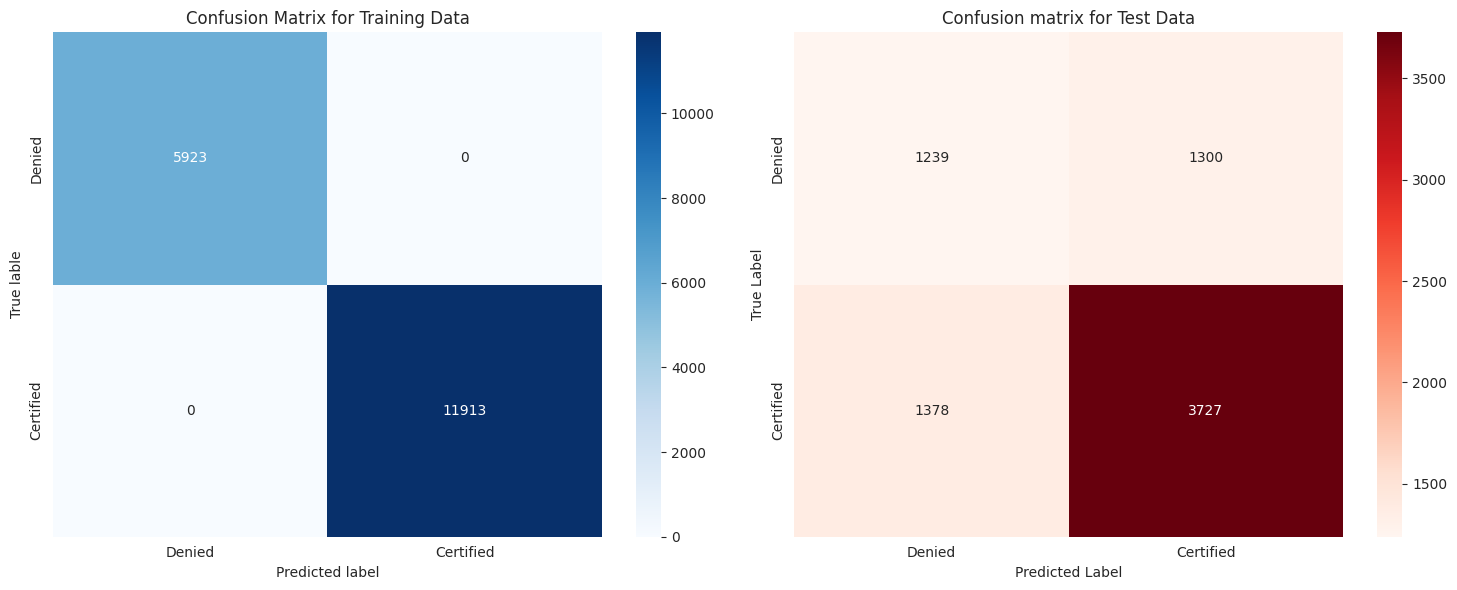

In [137]:
#Prediction for test data is arleady predicted
#now making prediction on training set
y_train_pred = dtree.predict(X_train)

#Calculate confusion Matrix
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_pred)

#Ploting the confusion Matrix for the Train Data
fig, axes = plt.subplots(1, 2, figsize = (15, 6)) #Create a figure with two subplots
sns.heatmap(train_cm, annot = True, fmt ='d', cmap= 'Blues', ax = axes[0],
            xticklabels = ['Denied', 'Certified'],
            yticklabels = ['Denied', 'Certified'])
axes[0].set_title('Confusion Matrix for Training Data')
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True lable')


#Ploting the confusion Matrix for Test Data
sns.heatmap(test_cm, annot = True, fmt ='d', cmap = 'Reds', ax = axes[1],
            xticklabels = ['Denied', 'Certified'],
            yticklabels = ['Denied', 'Certified'])
axes[1].set_title('Confusion matrix for Test Data')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.savefig('Confusion_matrix.png')
plt.show();

##Observation on Confusion Matrix:
  - This confusion matrix clearly shows that model is weak on identifying the Denied Cases also it looks biased on majority classes (Certified)

  - **Biggest problem- Missed Denied Cases** : If you see the top right corner box of Test data matrix, you can see that model has wrongly certified to large number of Denied Cases.

  - **Overfitting visuals on matrix** : When you look both(Train and Test) matrix and compare then you will find that model is performing so well on training set however it did not perform well on test data. it indicates the model is overfit, which means model has learned too much on training set however not able to find thing on test data.

##Visualize the Decision Tree

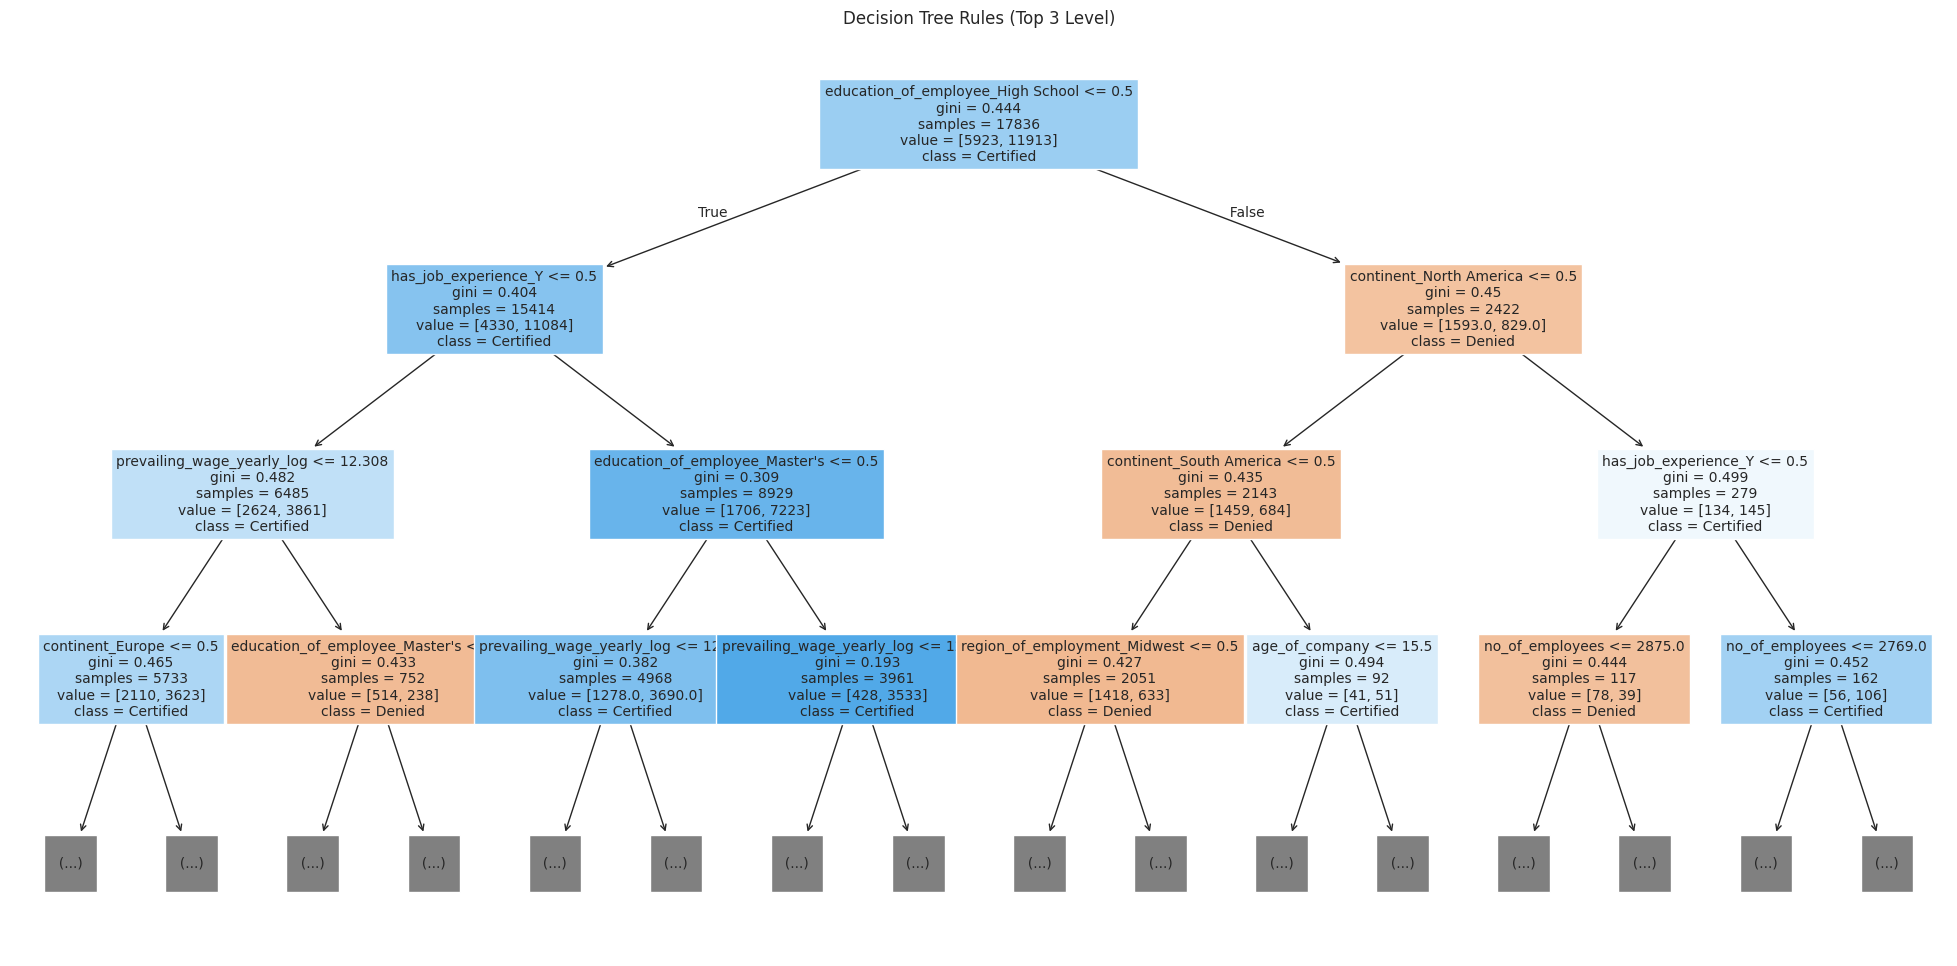

In [138]:
plt.figure(figsize = (25,12))
plot_tree(
    dtree,                                                             #Decision Tree model
    max_depth=3,                                                       #Setting the max depth of tree
    feature_names = X_train.columns,                                   #Setup the name for the features in the plot
    class_names = ['Denied', 'Certified'],                             #Setup the name for the target variable in the plot instead of 0 and 1
    filled= True,                                                      #it gives the color as per the majority of classes
    fontsize =10                                                      #Font size of the text in the plot
)

plt.title("Decision Tree Rules (Top 3 Level)")                         #Giving the title for this plot
plt.savefig("Decision_Tree.png")                                       #Saving the plot in png format
plt.show();                                                             #Show the plot

# Observation on Decision Tree:
  - This Tree acually shows us the brain of Model how it is taking decision. We can see which of the question decision Tree is asking to take next step.
  - In this tree first question was asked about education_of_employee if True then has_job_experience for False continent_North America
  - If True for has_job_experience then prevailing_wage_yearly_log and for False education_of_employee_master.
  - So this is how it keep asking the questions.

###Visualize the Important Features from Decision Tree Model

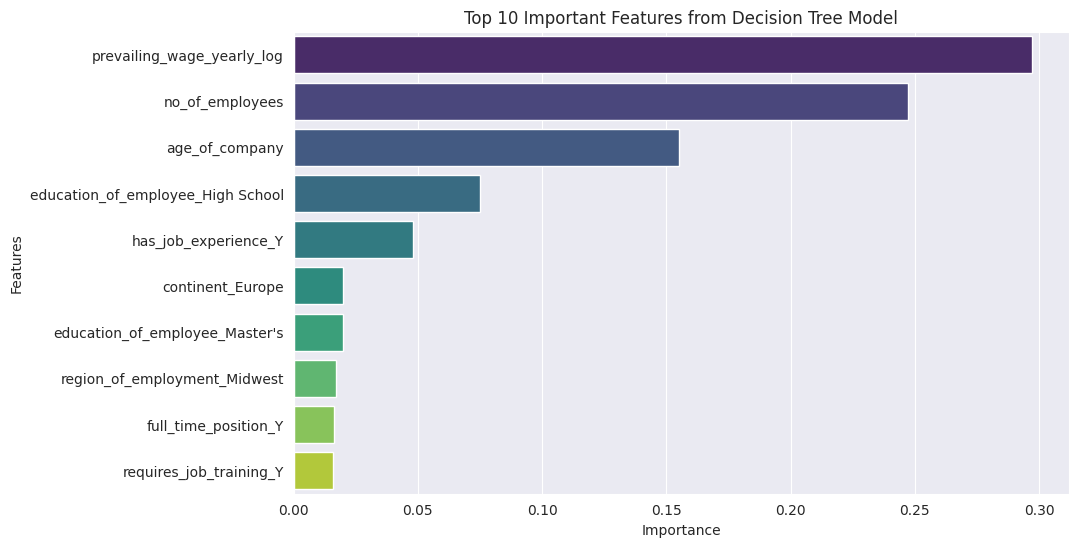

In [139]:
#Get the important features from Decision Tree Model
important_features = dtree.feature_importances_

#Creating the pandas Dataframe for easier plotting
important_features_df = pd.DataFrame(
    {
        'Features' : X_train.columns,
        'Importance' : important_features
    }
).sort_values('Importance', ascending= False)

#top 10 important features
top_features = important_features_df.head(10)

#Creating the plot for importance features
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Importance', y= 'Features', data = top_features, palette = 'viridis')
plt.title('Top 10 Important Features from Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.savefig('Important_features.png')
plt.show()

##Obsersvation:
  - This chat shows clearly that which features are playing the major role to take the decision of selecting and rejecting the visa.
  - As we can see that prevailing_wage_yearly_log, no_of_employees, age_of_the_company and education_of_high_school are palying the major role in visa process.

  - **Business Insight** from this plot OFLC would know that which of the factors are most important to focus on.

###Visualize the Decision Rule for this Model

In [140]:
#Shorter version of Decision Rules (Top 3 Levels)
decision_rules = export_text(dtree, feature_names = list(X_train.columns), max_depth=3)
print(decision_rules)

|--- education_of_employee_High School <= 0.50
|   |--- has_job_experience_Y <= 0.50
|   |   |--- prevailing_wage_yearly_log <= 12.31
|   |   |   |--- continent_Europe <= 0.50
|   |   |   |   |--- truncated branch of depth 30
|   |   |   |--- continent_Europe >  0.50
|   |   |   |   |--- truncated branch of depth 20
|   |   |--- prevailing_wage_yearly_log >  12.31
|   |   |   |--- education_of_employee_Master's <= 0.50
|   |   |   |   |--- truncated branch of depth 23
|   |   |   |--- education_of_employee_Master's >  0.50
|   |   |   |   |--- truncated branch of depth 18
|   |--- has_job_experience_Y >  0.50
|   |   |--- education_of_employee_Master's <= 0.50
|   |   |   |--- prevailing_wage_yearly_log <= 12.31
|   |   |   |   |--- truncated branch of depth 34
|   |   |   |--- prevailing_wage_yearly_log >  12.31
|   |   |   |   |--- truncated branch of depth 19
|   |   |--- education_of_employee_Master's >  0.50
|   |   |   |--- prevailing_wage_yearly_log <= 12.30
|   |   |   |   |---

###Observation from this decision Rules:
  - This rules shows us the how the model choose specific path.
    - This model tryin to find the applicants passed the high school and has job experience also applicants salary at certain level.
 - Models is trying to build a detailed profile, its not just focusing on 1 or 2 things it is checking every factors like Educataion. salary, experience, continent, age of the company.    

#Model 2 (Random Forest Classifier)

## Why Random Forest Classifier:
 - It is based on Bagging (Bootstrap Aggregating ). As the name suggest it makes multiple decision tree, every tree trained on different part of data and the final prediction would be the average of all the tree result.
    - With this model accuracy gets improved and reduce the overfitting of the model. This model consider as one step beyond from Decision Tree Model.

## Building and training the RandomForestClassifier

In [141]:
#Instance creation of Decision Tree model
#We are using 100 decision tree for this model
rf_cls = RandomForestClassifier(random_state= 42, n_estimators= 100)

#Fitting the model
rf_cls.fit(X_train, y_train)

#Making the prediction
y_pred_rf_cls = rf_cls.predict(X_test)

## Model Evaluation

In [142]:
#Computing the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_rf_cls)

#Computing the F1 Score of the model
f1 = f1_score(y_test, y_pred_rf_cls)

#Compute the classificaiton report of the model
rf_clf_report = classification_report(y_test, y_pred_rf_cls, target_names = ['Denied', 'Certified'])

##Printing the Result

In [143]:
print("RandomForestClassifer Performance")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf_cls)}")
print(f"F1 Score : {f1_score(y_test, y_pred_rf_cls)}")
print(' ')

print("Classification report")
print(rf_clf_report)

RandomForestClassifer Performance
Accuracy:  0.7178178963893249
F1 Score : 0.7973315794418867
 
Classification report
              precision    recall  f1-score   support

      Denied       0.59      0.49      0.54      2539
   Certified       0.77      0.83      0.80      5105

    accuracy                           0.72      7644
   macro avg       0.68      0.66      0.67      7644
weighted avg       0.71      0.72      0.71      7644



##Observation


- **Accuracy_Score**: Model overall accuracy is 71% which is better than the Decision Tree which was 64% correct.

- **F1 Score**: F1 Score for Certified cases has been improved however denied cases score is not showing any significant imporovement.
      - Certified cases : 80%
      - Denied Cases : 54%

- **Recall & Precision Score**: Denied cases are low which means model is not performing well on prediction of denied cases.
      - Recall is 49% and Precision is 59% for Denied Cases
      - Recall is 83% and Precision is 77% for Certified Cases

- As the recall for certified cases is 83% (imporoved now) which means model is able to predict 83% certified cases out of total Truly certified.

- Overall model is performing or imporoving on certified cases however it is not showing improvement on Denied cases but in the processing further with Random Forest would be great choice.

#Model - 3 (BagginngClassifier)

## Why BaggingClassifier:
 - Random Forest model is special type of Baggin Model. BaggingClassifier is a general purpose model where we can use any base model like Decision Tree.
    - We have choosen this model to see if generic Bagging give the performance as same like Random Forest or give the different performance.

## Building and training the BaggingClassifier

In [144]:
#Creating the instance of Bagging model
#We are using 100 decision tree for this model
bag_clf = BaggingClassifier(estimator = DecisionTreeClassifier(random_state=42), n_estimators =100, random_state =42)

#Fitting the model
bag_clf.fit(X_train, y_train)

#Making the prediction
y_pred_bag_clf = bag_clf.predict(X_test)

## Model Evaluation

In [145]:
#Computing the Accuracy score of the model
Bag_accuracy = accuracy_score(y_test, y_pred_bag_clf)


#computing the f1 score of the model
bag_f1 = f1_score(y_test, y_pred_bag_clf)

#geting the calssification report of bagging model
bag_clf_report = classification_report(y_test, y_pred_bag_clf, target_names = ['Denied', 'Certifiied'])



##Printing the Result

In [146]:
print("BaggingClassifier Performance")
print(f"Accuracy: {Bag_accuracy :.4f}")
print(f"F1 Score : {bag_f1 :.4f}")
print(' ')

print("Classification Report")
print(bag_clf_report)


BaggingClassifier Performance
Accuracy: 0.7174
F1 Score : 0.7963
 
Classification Report
              precision    recall  f1-score   support

      Denied       0.59      0.50      0.54      2539
  Certifiied       0.77      0.83      0.80      5105

    accuracy                           0.72      7644
   macro avg       0.68      0.66      0.67      7644
weighted avg       0.71      0.72      0.71      7644



##Observation

- **Accuracy** : Overall accuracy of Bagginng Classifier is 71% which is less than Random Forest (71%) however it is far better than Decision Tree (64%)

- **F1 Score**: F1 score for Bagging and Random ae the same.
      For both cases (Certified and Denied ) Random and bagging has the same score
      - Certified cases : 80%
      - Denied Cases : 54%

- Overall Bagging is playing well here hwoever it is almost the same with Random Forest.

#Model - 4 (Boosting - AdaBoost Classifier)

##Why AdaBoost Classifier:
- AdaBoost is a boosting model and it is also known as Adaptive boosting it works in different way from RandomForest. AdaBoost train the model (DecisionTree) and analyse its error and then make new model and fix the error made by previous model. Similary keep correcing the error and with this process model performance gradually improved.

## Building and training the AdaboostClassifier

In [147]:
#instance creation for Adaboost
#We are using 100 decision tree for this model
ada_clf = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth=1), random_state =42, n_estimators=100)

#fitting the model
ada_clf.fit(X_train, y_train)

#Making prediction
y_pred_ada_clf = ada_clf.predict(X_test)

## Model Evaluation


In [148]:
#computing the accuracy
ada_accuracy = accuracy_score(y_test, y_pred_ada_clf)


#computing the f1 Score
ada_fl = f1_score(y_test, y_pred_ada_clf)

#Computing the classification report
ada_clf_report = classification_report(y_test, y_pred_ada_clf, target_names = ['Denied', 'Certified']
                                       )

##Printing the Result

In [149]:
print("AdaBoostClassifier Performance")
print(f"Accuracy : {ada_accuracy :.4f}")
print(f"F1 Score : {ada_fl :.4f}")
print(' ')
print("Classification Report")
print(ada_clf_report)

AdaBoostClassifier Performance
Accuracy : 0.7296
F1 Score : 0.8135
 
Classification Report
              precision    recall  f1-score   support

      Denied       0.64      0.42      0.51      2539
   Certified       0.75      0.88      0.81      5105

    accuracy                           0.73      7644
   macro avg       0.70      0.65      0.66      7644
weighted avg       0.72      0.73      0.71      7644



##Observation


- **Accuracy** : Overall accuracy of Adaboost Classifier is 72% which more than Decision Tree(64%), Random Forest(71%) and Baggingclassifier(71%)

- **F1 Score**: F1 score for Bagging similar to Bagging and Random.
      For both cases (Certified and Denied ) Random and bagging has the same score
      - Certified cases : 81%
      - Denied Cases : 51%

- Overall AdaBagging is playing well here hwoever it is also struggling to identify 'Denied' cases for F1 Score.

- One positive sign is that AdaboostClassifier is performing well compare than Random Forest.

#Model - 5 (Gradient Boosting Classifer)

##Why Gradient Boosting Classifer:
- Gradient Boosting also work like AdaBoost. This Classifier train the model (DecisionTree) and analyse its error and then make new model and fix the error made by previous model.
  - This model uses the gradients to identify the errors of previous model which is the most powerful approach to make the strong model.

## Building and training the GredientBoostingClassifier

In [150]:
#Instance Creation for model
#We are using 100 decision tree for this model along with depth of 3 and learning rate 0.1
gred_boost_clf = GradientBoostingClassifier(random_state = 42, max_depth=3, learning_rate =0.1, n_estimators =100)

#fitting the model
gred_boost_clf.fit(X_train, y_train)

#making the prediction
y_pred_gred_boost_clf = gred_boost_clf.predict(X_test)


## Model Evaluation

In [151]:
#computing the accuracy
gred_boost_clf_accuracy = accuracy_score(y_test, y_pred_gred_boost_clf)

#computing the f1 Score
gred_boost_clf_f1 = f1_score(y_test, y_pred_gred_boost_clf)

#computing the classification refport for model
gred_boost_clf_report = classification_report(y_test, y_pred_gred_boost_clf, target_names = ['Denied', 'Certified'])

##Printing the Result

In [152]:
print("GradientBoostingClassifier performance")
print(f"Accuracy: {gred_boost_clf_accuracy :.4f}")
print(f"F1 Score : {gred_boost_clf_f1 :.4f}")
print(' ')
print("Classification Report")
print(gred_boost_clf_report)

GradientBoostingClassifier performance
Accuracy: 0.7405
F1 Score : 0.8172
 
Classification Report
              precision    recall  f1-score   support

      Denied       0.65      0.48      0.55      2539
   Certified       0.77      0.87      0.82      5105

    accuracy                           0.74      7644
   macro avg       0.71      0.68      0.68      7644
weighted avg       0.73      0.74      0.73      7644



##Observation

- **Accuracy** : Overall accuracy of Adaboost Classifier is 74% which more than Decision Tree(64%), Random Forest(71%) Baggingclassifier(71%) and Adaboosting(72%)

- **F1 Score**: F1 score for Gredient Boosting is  similar to AdaBoosting, Bagging and Random.
      For both cases (Certified and Denied ) are almost similar for AdaBoosting, Random and bagging.
      - Certified cases : 82%
      - Denied Cases : 55%

- Overall AdaBoosting and Gredient Boosting have almost similar performance hwoever it is also struggling to identify 'Denied' cases for F1 Score.

#Report for all the models on Original dataset

In [153]:
#Dictionary for the performance for each model
original_data = {
    'Model' : ['Decision Tree', 'Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy' : [0.64, 0.71, 0.71, 0.72, 0.74],
    'F1_Score' : [0.73, 0.79, 0.79, 0.81, 0.81],
    'Recall_Certified' : [0.73, 0.83, 0.83, 0.88, 0.87],
    'Recall_Denied' : [0.49, 0.49, 0.50, 0.42, 0.48],
    'Precision_Certified' : [0.74, 0.77, 0.77, 0.75, 0.77],
    'Precision_Denied' : [0.47, 0.59, 0.59, 0.64, 0.65],
    'F1_Score_Certified' : [0.74, 0.80, 0.80, 0.81, 0.82],
    'F1_Score_Denied' : [0.48, 0.54, 0.54, 0.51, 0.55]
}

#Create the dataframe from the dictionary
comparison_df = pd.DataFrame(original_data)

#printing the dataframe in tabular format
print(comparison_df.to_markdown(index = False))

| Model             |   Accuracy |   F1_Score |   Recall_Certified |   Recall_Denied |   Precision_Certified |   Precision_Denied |   F1_Score_Certified |   F1_Score_Denied |
|:------------------|-----------:|-----------:|-------------------:|----------------:|----------------------:|-------------------:|---------------------:|------------------:|
| Decision Tree     |       0.64 |       0.73 |               0.73 |            0.49 |                  0.74 |               0.47 |                 0.74 |              0.48 |
| Random Forest     |       0.71 |       0.79 |               0.83 |            0.49 |                  0.77 |               0.59 |                 0.8  |              0.54 |
| Bagging           |       0.71 |       0.79 |               0.83 |            0.5  |                  0.77 |               0.59 |                 0.8  |              0.54 |
| AdaBoost          |       0.72 |       0.81 |               0.88 |            0.42 |                  0.75 |               

##Observation

- **Top Performer**: AdaBoosting and GredientBoosting given the great performance comparing then all other models, Both AdaBoosting and GredientBoosting (72% and 74% ) have the highest accuracy and their F1 Scores also showing great result (81%)

- **Advantages of Ensembles Model**: All Ensemble models Random Forest, Bagging, AdaBoost and GredientBoosting has peformed far better than Decision Tree.  Ensembles model peformed between (71% to 74%) and Decision Tree was with (64%). It shows that Ensemble methods are more powerful for our dataset.

- **Impact of Imbalance dataset**: As we have seen that our dataset is impbalanced and it is clearly shown in the analysis as well.
    - **Certified Cases**: Every models are able to predicted certified cases very well as we can see that for Certified Cases the F1_Score ranges from (74% to 82%)

    - **Denied Cases**: Models are not able to predict well to Denied cases as we can seen that Denied Cases are ranges from (48% to 55%)

- **Precision and Recall**:
    - Denied Cases :
      - **High Precision**: AdaBoost and GredientBoostingClassifier are playing very well for the Denied Cases as thier precision score is 65% which if when they predict to applicants as denied so they are correct most of the time.

      - **Lowe Recall**: Recall score is very low which is range from (48% to 50%) which means these models are not able to identify the Denied cases even they are predicted wrong by saying Certified who's are actually Denied Cases.

    - Certified Cases :
      - **High Precision**: Every model are performing well on certified cases specially Adaboost and GredientBoosting with (77%) which means these models are able to identify certified cases with 77% accurately.

 - **Summary** On the basis of these analysis AdaBoost and GredientBoosting are our top model however we need to improve their Recall for Denied cases so that our model would be more balanced.


#Criteria 4

##Oversampled Models

##1. Build and Train the Decision Tree Model on Oversampled Data with SMOTE

- Why SMOTE: As rubric says that build a model on oversampled data so SMOTE is truly oversample technique. It actually create new data points as synthetic samples to balance the dataset.
  - By using this code `smote.fit_resample()` we create new larger balanced training set. This is the perfect match as per the requirement.

In [154]:
#Initialize SMOTE
smote = SMOTE(random_state=42)

#Fit and transform the data
X_train_smote_over, y_train_smote_over = smote.fit_resample(X_train, y_train)


In [155]:
#Check the data size to verify
print(f"Size of Target variable before Oversampling : {y_train.value_counts()}")

print(f"Size of Target variable after Oversampling : {y_train_smote_over.value_counts()}")

Size of Target variable before Oversampling : case_status
1    11913
0     5923
Name: count, dtype: int64
Size of Target variable after Oversampling : case_status
0    11913
1    11913
Name: count, dtype: int64


###This output confirms that SMOTE has sucessfully applied on the data.

## 1. Build and Train the Decesion Tree Model on Oversampled Data- SMOTE

In [156]:
#Instance creation for Decision Tree model
dtree_oversampled = DecisionTreeClassifier(random_state =42)

#fitting the model
dtree_oversampled.fit(X_train_smote_over, y_train_smote_over)

#making the prediction on oversampled data
y_pred_oversampled = dtree_oversampled.predict(X_test)

## Model evaluation

In [157]:
#computing the accuracy of omversampled data
accuracy_oversampled = accuracy_score(y_test, y_pred_oversampled)

#computin the f1 score
f1_oversampled = f1_score(y_test, y_pred_oversampled)

#Calculating the classification report
dtree_oversample_class_report= classification_report(y_test, y_pred_oversampled, target_names = ['Denied', 'Certified'])


##Printing the result

In [158]:
print("Decision Tree performance on Oversampled Data with SMOTE")
print(f"Accuracy : {accuracy_oversampled :.4f}")
print(f"F1 Score : {f1_oversampled : .4f}")
print(' ')

print("Classification Report on oversampled Data")
print(dtree_oversample_class_report)

Decision Tree performance on Oversampled Data with SMOTE
Accuracy : 0.6565
F1 Score :  0.7390
 
Classification Report on oversampled Data
              precision    recall  f1-score   support

      Denied       0.48      0.51      0.50      2539
   Certified       0.75      0.73      0.74      5105

    accuracy                           0.66      7644
   macro avg       0.62      0.62      0.62      7644
weighted avg       0.66      0.66      0.66      7644



## Observation for Decision Tree Model  [ Original Data Vs Oversampled Data (SMOTE) ]


- There is small  imrovement we are seeing by using the SMOTE technique specially in it's ability to identify the minority Denied Class.

  - **Overall Improvement**: F1 Score for Denied Cases on Original Data was 48% and now it has been increased at 50%.
  - **Improved Recall** : Goal of oversampling was to make the model better to identify finding the Denied Cases.
    - Recall for Denied Case on Original Data was 49% and now it has been increased at 51%.

- Conclusion:  By using the SMOTE technique the model is getting more sensitive which means that model is now identifying the Denied Cases.

## Confusion matrix for both Train and Test Data on Oversampled Dataset

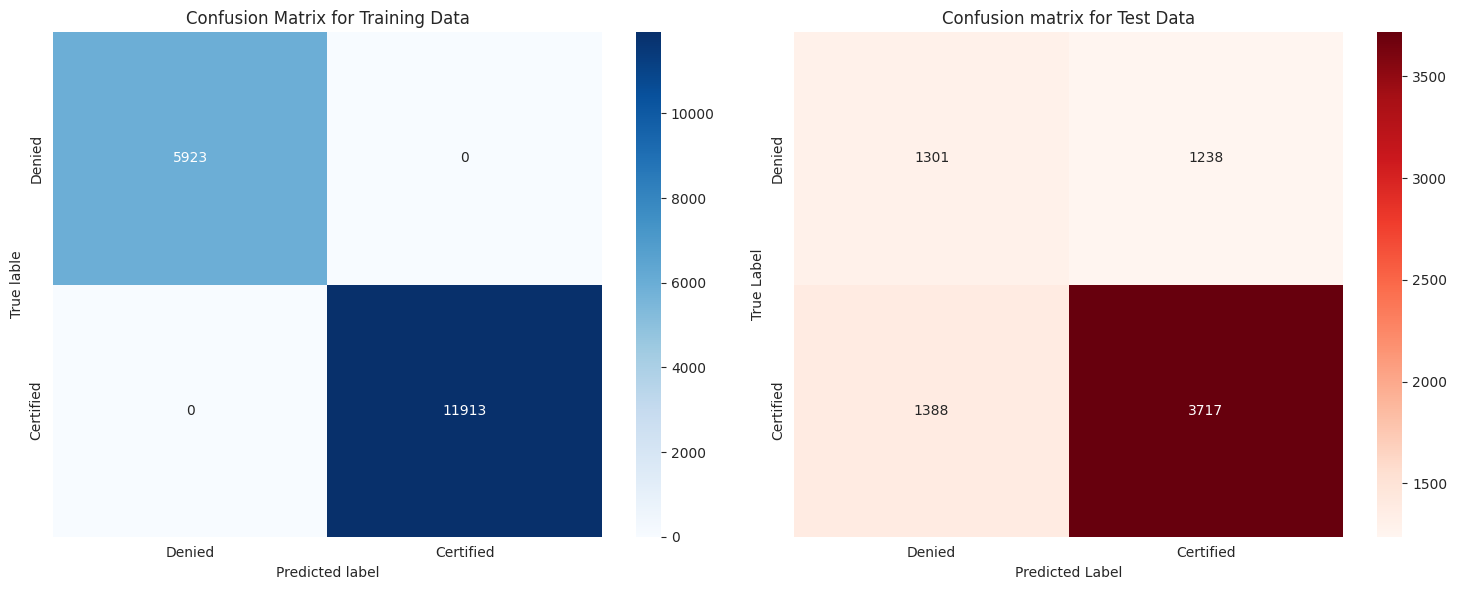

In [159]:
#Prediction for test data is arleady predicted

#now making prediction on training set
y_pred_oversampled_train = dtree_oversampled.predict(X_train)
#making the prediction on oversampled data on test set
y_pred_oversampled_test = dtree_oversampled.predict(X_test)

#Calculate confusion Matrix
train_cm = confusion_matrix(y_train, y_pred_oversampled_train)
test_cm = confusion_matrix(y_test, y_pred_oversampled_test)

#Ploting the confusion Matrix for the Train Data
fig, axes = plt.subplots(1, 2, figsize = (15, 6)) #Create a figure with two subplots
sns.heatmap(train_cm, annot = True, fmt ='d', cmap= 'Blues', ax = axes[0],
            xticklabels = ['Denied', 'Certified'],
            yticklabels = ['Denied', 'Certified'])
axes[0].set_title('Confusion Matrix for Training Data')
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True lable')


#Ploting the confusion Matrix for Test Data
sns.heatmap(test_cm, annot = True, fmt ='d', cmap = 'Reds', ax = axes[1],
            xticklabels = ['Denied', 'Certified'],
            yticklabels = ['Denied', 'Certified'])
axes[1].set_title('Confusion matrix for Test Data')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.savefig('Confusion_matrix.png')
plt.show();

## Observation on confusion matrix on Train and Test Data on Oversampled Data:
  - This is the classic and extreme case of overfitting.
    - **Perfect memorization on Training Data** : The training set shows zero error. This means model has perfectly memorize the every training data. Exactly as the student do rote learning with chapters.

    - **Poor Performance on Test Data** : This Matrix show the actual really of model power. This model makes a large number of mistakes on new unseen data, As we can see the large number of mistake on False positive(1228)

##Visualize the Decision Tree on Oversampled Data

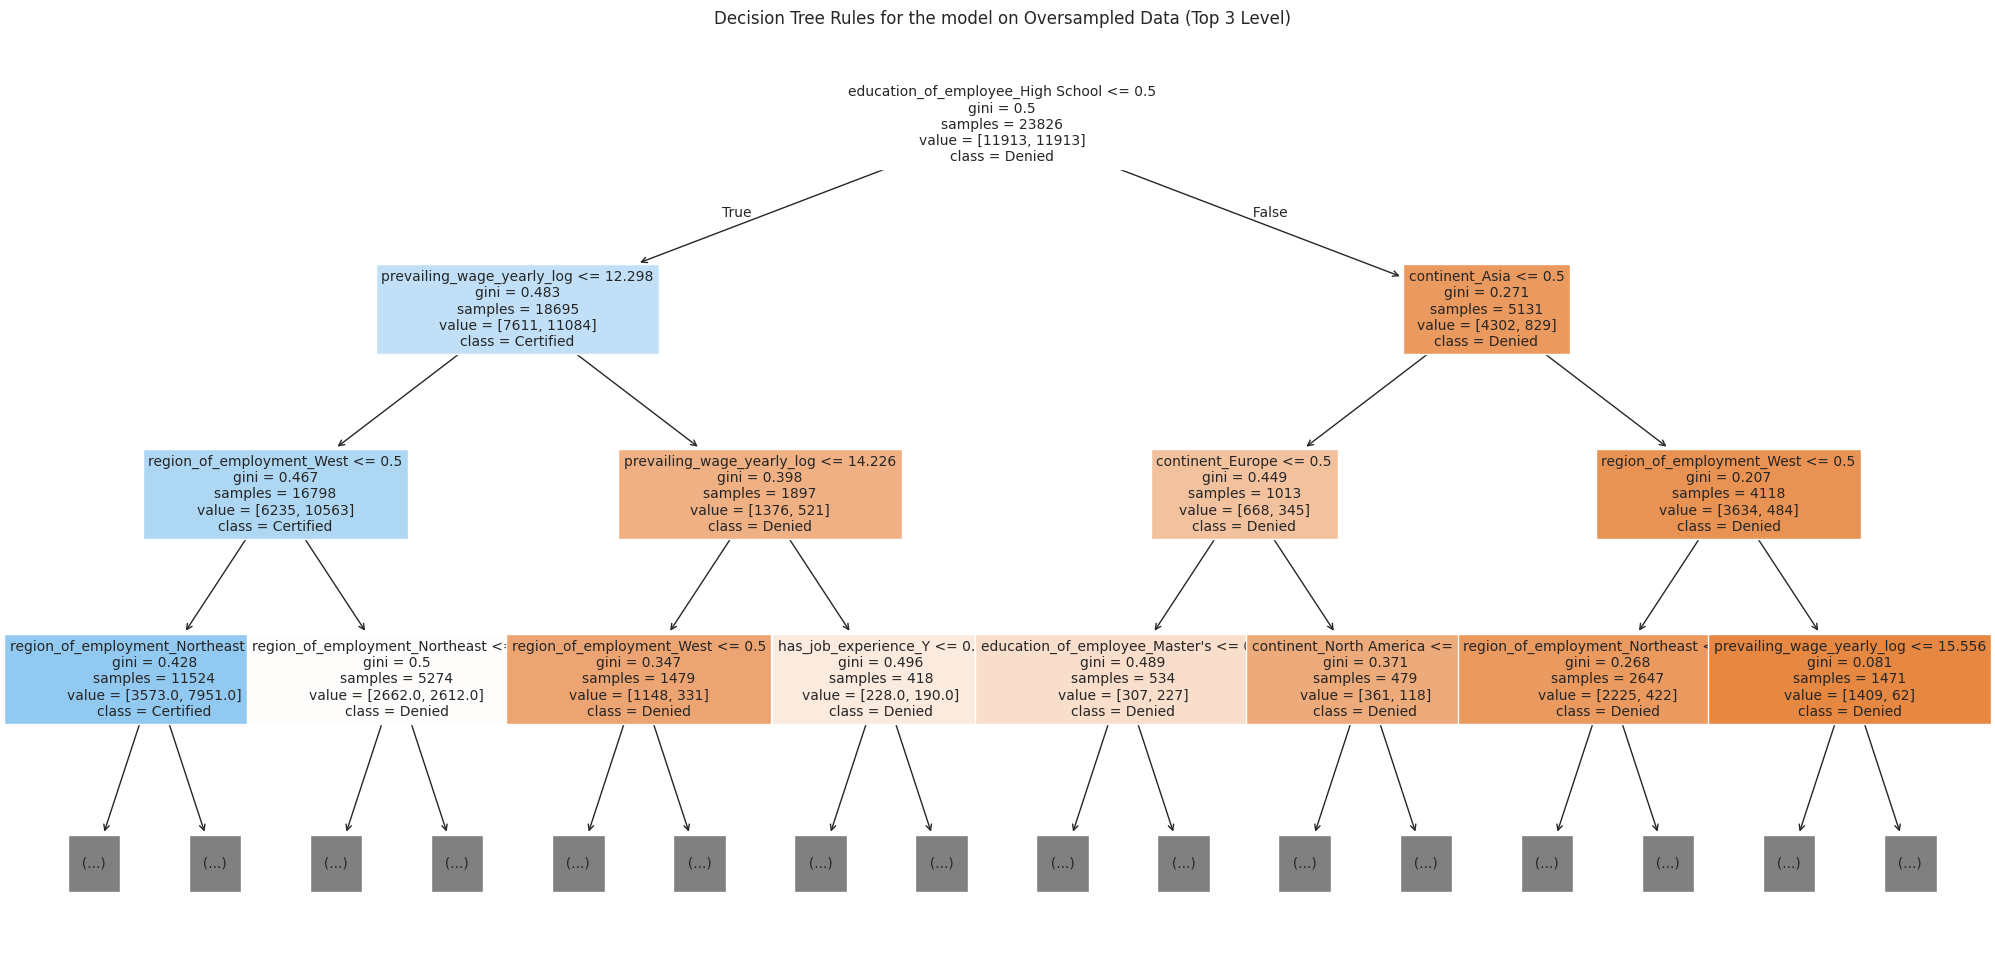

In [160]:
plt.figure(figsize = (25,12))
plot_tree(
    dtree_oversampled,                                                 #Decision Tree model
    max_depth=3,                                                       #Setting the max depth of tree
    feature_names = X_train.columns,                                   #Setup the name for the features in the plot
    class_names = ['Denied', 'Certified'],                             #Setup the name for the target variable in the plot instead of 0 and 1
    filled= True,                                                      #it gives the color as per the majority of classes
    fontsize =10                                                       #Font size of the text in the plot
)

plt.title("Decision Tree Rules for the model on Oversampled Data (Top 3 Level)")  #Giving the title for this plot
plt.savefig("Decision_Tree_Oversampled.png")                            #Saving the plot in png format
plt.show();                                                             #Show the plot

# Observation on Decision Tree:
  - This Tree acually shows us the brain of Model how it is taking decision. We can see which of the question decision Tree is asking to take next step.

  - In this tree pattern of asking question has changed little bit.
  - In this treeo on oversampled data first question was asked about education_of_employee_of_high_school if True then prevailing_wage_yearly_log for False continent_Asia.
  - If True for prevailing_wage_yearly_log then region_of_employment_west and for False prevailing_wage_yearly_log with higher Salary.
  - So this is how it keep asking the questions.

##Visualize the Important Features from Decision Tree Model on Oversampled Data

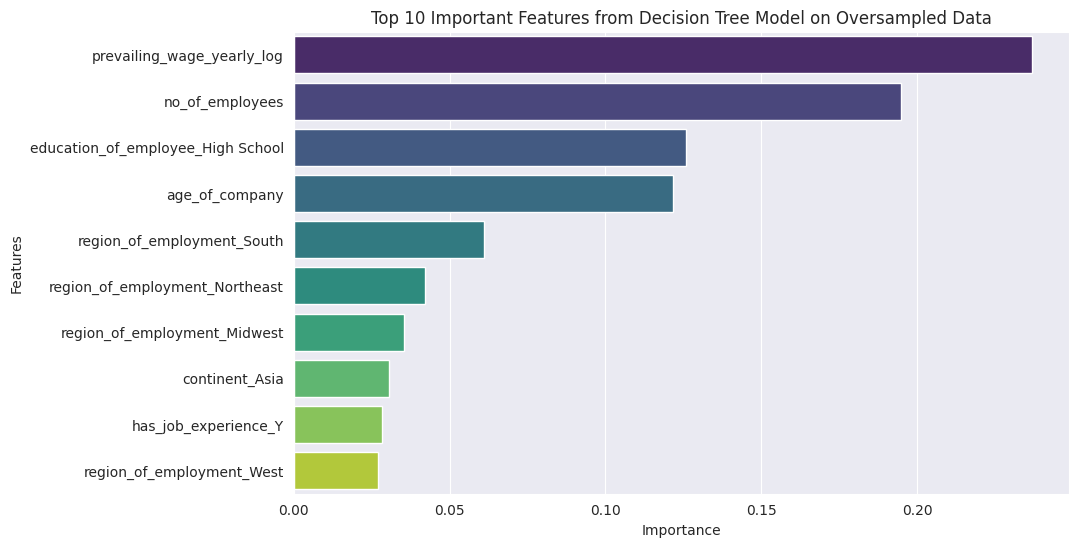

In [92]:
#Get the important features from Decision Tree Model
important_features = dtree_oversampled.feature_importances_

#Creating the pandas Dataframe for easier plotting
important_features_df = pd.DataFrame(
    {
        'Features' : X_train.columns,
        'Importance' : important_features
    }
).sort_values('Importance', ascending= False)

#top 10 important features
top_features = important_features_df.head(10)

#Creating the plot for importance features
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Importance', y= 'Features', data = top_features, palette = 'viridis')
plt.title('Top 10 Important Features from Decision Tree Model on Oversampled Data')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.savefig('Important_featureson Oversampled Data.png')
plt.show()

##Obsersvation:
  - The contribution of features in the visa process is the same as it was on original data set.
  - This chat shows clearly that which features are playing the major role to take the decision of selecting and rejecting the visa.
  - As we can see that prevailing_wage_yearly_log, no_of_employees, age_of_the_company and education_of_high_school are palying the major role in visa process.

  - **Business Insight** from this plot OFLC would know that which of the factors are most important to focus on.

##Visualize the Decision Rule for this Model on oversampled Data


In [161]:
#Shorter version of Decision Rules (Top 3 Levels)
decision_rules = export_text(dtree_oversampled, feature_names = list(X_train.columns), max_depth=3)
print(decision_rules)

|--- education_of_employee_High School <= 0.50
|   |--- prevailing_wage_yearly_log <= 12.30
|   |   |--- region_of_employment_West <= 0.50
|   |   |   |--- region_of_employment_Northeast <= 0.50
|   |   |   |   |--- truncated branch of depth 39
|   |   |   |--- region_of_employment_Northeast >  0.50
|   |   |   |   |--- truncated branch of depth 38
|   |   |--- region_of_employment_West >  0.50
|   |   |   |--- region_of_employment_Northeast <= 0.50
|   |   |   |   |--- truncated branch of depth 39
|   |   |   |--- region_of_employment_Northeast >  0.50
|   |   |   |   |--- class: 0
|   |--- prevailing_wage_yearly_log >  12.30
|   |   |--- prevailing_wage_yearly_log <= 14.23
|   |   |   |--- region_of_employment_West <= 0.50
|   |   |   |   |--- truncated branch of depth 21
|   |   |   |--- region_of_employment_West >  0.50
|   |   |   |   |--- truncated branch of depth 17
|   |   |--- prevailing_wage_yearly_log >  14.23
|   |   |   |--- has_job_experience_Y <= 0.50
|   |   |   |   |--

###Observation from this decision Rules:
  - This rules shows us the how the model is doing multi-level verification to reach the decision point.
    - There is a sequence of decision. First it's checking the the applicants passed the high school, prevailing_wage, region_of_employment.

 - Models built a detailed profile for that it creates more deep and comples tree.

#2. Build and Train the RandomForestClassifer Model on Oversampled Data- SMOTE

In [162]:
#Instance creation for random forest on oversampled data
rf_oversample = RandomForestClassifier(random_state = 42, n_estimators =100)


#fitting the model
rf_oversample.fit(X_train_smote_over, y_train_smote_over)

#making the prediction
y_pred_rf_oversample = rf_oversample.predict(X_test)


## Model Evaluation

In [163]:
#computing the accuracy of the model
accuracy_rf_oversample = accuracy_score(y_test, y_pred_rf_oversample)

#computing the F1 Score of the model
f1_score_oversample = f1_score(y_test, y_pred_rf_oversample)

#computing the classification report of model
rf_classificaion_oversample = classification_report(y_test, y_pred_rf_oversample, target_names = ['Denied', 'Certified'])

## Printing the result

In [164]:
print("Randomr Forest Classification Report on Oversampled Data")
print(f"Accuracy : {accuracy_rf_oversample :.4f}")
print(f"F1 Score : {f1_score_oversample :.4f}")

print(' ')
print("Classification Report")
print(rf_classificaion_oversample)

Randomr Forest Classification Report on Oversampled Data
Accuracy : 0.7118
F1 Score : 0.7893
 
Classification Report
              precision    recall  f1-score   support

      Denied       0.57      0.52      0.54      2539
   Certified       0.77      0.81      0.79      5105

    accuracy                           0.71      7644
   macro avg       0.67      0.66      0.67      7644
weighted avg       0.71      0.71      0.71      7644



## Observation for RandomForestClassifer Model  [ Original Data Vs Oversampled Data (SMOTE) ]

 - **Recall increased but precision decreased** : Goal of using SMOTE is to identiy the Denied cases which happened as well (Recall Increased from 49% to 52% )  however on the other the precision has been decreased (59% to  57%) which meand model is able to identify the Denied cases however loosing the potential prediction on model.

- **Overall Performance** : As Recall is increaase and precision is decreased that's why the F1 Score is same (54%) which indicates that for this specific model SMOTE has not added any value in overall performance.


#3. Build and Train the BaggingClassifier Model on Oversampled Data - SMOTE

In [165]:
#Instance creation for BaggingClassifier Model on oversampled data
bagg_clf_oversampled = BaggingClassifier(estimator= DecisionTreeClassifier(random_state=42), random_state =42, n_estimators =100)

#fitting the model
bagg_clf_oversampled.fit(X_train_smote_over, y_train_smote_over)

#making the prediction
y_pred_bagg_clf_oversampled = bagg_clf_oversampled.predict(X_test)

##Model Evaluation

In [166]:
#computing the Accuracy of the model
acc_over_bagg_clf = accuracy_score(y_test, y_pred_bagg_clf_oversampled)

#computing the f1 Score of the model
f1_over_bagg_clf = f1_score(y_test, y_pred_bagg_clf_oversampled)

#compting the classification report
bagg_clf_over_classification_report = classification_report(y_test, y_pred_bagg_clf_oversampled, target_names = ['Denied', 'Certified'])


##Printing the result

In [167]:
print("BaggingClassifier Performance on Oversampled Data")
print(f"Accuracy : {acc_over_bagg_clf :.4f}")
print(f"F1 Score : {f1_over_bagg_clf : .4f}")
print(' ')

print("Classification Report")
print(bagg_clf_over_classification_report)


BaggingClassifier Performance on Oversampled Data
Accuracy : 0.7105
F1 Score :  0.7872
 
Classification Report
              precision    recall  f1-score   support

      Denied       0.57      0.53      0.55      2539
   Certified       0.77      0.80      0.79      5105

    accuracy                           0.71      7644
   macro avg       0.67      0.66      0.67      7644
weighted avg       0.71      0.71      0.71      7644



## Observation for BaggingClassifer Model [ Original Data Vs Oversampled Data (SMOTE) ]

- **Better Recall with decreased Precision** : We are seeing the same patter here as well, ability to identify the Denied cases are getting better (50% to 53% ) which is actually our goal is, however precision has been decreased (59% to  57%)

- **Overall Improvement** : It is little bit different from Random Forest. As socre was much improved in recall compare to loss of precision that's why the balance score which is F1 Score is better (54% to  55% ) It's small but positive improvement.

#4. Build and Train the AdaBoostClassifier Model on Oversampled Data - SMOTE

In [168]:
#instance cratetion for Adaboost model with SMOTE
adab_clf_smote = AdaBoostClassifier(random_state= 42)

#fit the model
adab_clf_smote.fit(X_train_smote_over, y_train_smote_over)

#making the prediction
y_pred_adab_clf_smote = adab_clf_smote.predict(X_test)

##Model Evaluation

In [169]:
#computing the accuracy for the model
adab_clf_smote_accuracy = accuracy_score(y_test, y_pred_adab_clf_smote)

#computing the f1 score for the model
adab_clf_smote_f1 = f1_score(y_test, y_pred_adab_clf_smote)

#computing the classification report for the model
adab_clf_smote_class_report = classification_report(y_test, y_pred_adab_clf_smote, target_names = ['Denied', 'Certified'])


##Printing the result


In [170]:
print("AdaBoost Classifer Performance on Oversampled Data with SMOTE")
print(f"Accuracy : {adab_clf_smote_accuracy :.4f}")
print(f"F1 Score : {adab_clf_smote_f1 : .4f}")
print(' ')

print("Classification Report")
print(adab_clf_smote_class_report)

AdaBoost Classifer Performance on Oversampled Data with SMOTE
Accuracy : 0.7292
F1 Score :  0.8098
 
Classification Report
              precision    recall  f1-score   support

      Denied       0.63      0.46      0.53      2539
   Certified       0.76      0.86      0.81      5105

    accuracy                           0.73      7644
   macro avg       0.69      0.66      0.67      7644
weighted avg       0.72      0.73      0.72      7644



##Observation : AdaBoost Classifier  [ Original Data Vs Oversampled Data (SMOTE) ]

- **Improvement on Recall** : On the Original dataset AdaBoost was missing so many Denied Cases which was (42%). By using the SMOTE technique Recall has been increased now at (46%). This is great improvement and it's good for our project.

- **F1 Score Improved** : Because recall has increased and there is no decreament in precision so the balance score which means the F1 Score has been increased from (51% to  53% ). This confirms that SMOTE is great for this model.

- Comparing of previous two models (Random Forest and Bagging) AdaBoost Classifier peformed well with the help of SMOTE technique. Great Improvement has been noted on recall.

#5. Build and Train the GredientBoosting Model on Oversampled Data - SMOTE

In [171]:
#instance creation on model
gred_clf_smote = GradientBoostingClassifier(random_state =42, max_depth=3, learning_rate =0.1, n_estimators =100)

#fit the model
gred_clf_smote.fit(X_train_smote_over, y_train_smote_over)

#making the prediction of model
y_pred_gred_smote = gred_clf_smote.predict(X_test)

##Model Evaluation

In [172]:
#computing the accuracy for the model
acc_gred_smote = accuracy_score(y_test, y_pred_gred_smote)

#computing the F1 Score of the model
F1_score_gred_smote = f1_score(y_test, y_pred_gred_smote)

#computing the classification report for the model
gred_smote_class_report = classification_report(y_test, y_pred_gred_smote, target_names = ['Denied', 'Certified'])


##Printing the result

In [173]:
print("GredientBoostingClassifier Performance on Oversampled Data with SMOTE")
print(f"Accuracy : {acc_gred_smote : .4f}")
print(f"F1 Score : {F1_score_gred_smote : .4f}")
print(' ')
print("Classification report")
print(gred_smote_class_report)

GredientBoostingClassifier Performance on Oversampled Data with SMOTE
Accuracy :  0.7355
F1 Score :  0.8106
 
Classification report
              precision    recall  f1-score   support

      Denied       0.62      0.51      0.56      2539
   Certified       0.78      0.85      0.81      5105

    accuracy                           0.74      7644
   macro avg       0.70      0.68      0.69      7644
weighted avg       0.73      0.74      0.73      7644



##Observation : Gradient Boosting Classifier  [ Original Data Vs Oversampled Data (SMOTE) ]

- **Better Recall with decreased Precision (Trade Off)** : With SMOTE, one more time we are seeing where the Recall has been increased (48% to 51%) however the model has loose the potential of predciction because this has been decrease (65% to 62%)


- **Small Improvement in F1 Score** : The best part is loss of precision score is bigger than the profit of recall which leads the improvement of balanced score (F1 Score from 55% to 56% ). This confirms that SMOTE is beneficial for this model.

- Gradient boosting classifier is one of the powerful model which was performed good on the original dataset now this has impoved much better on oversmapled data as well.


#Report for all the models on Oversample dataset on Oversampled Data(SMOTE)

In [174]:
#Dictionary for the performance for each model
oversampled_data = {
    'Model' : ['Decision Tree', 'Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy' : [0.65, 0.71, 0.71, 0.72, 0.73],
    'F1_Score' : [0.73, 0.78, 0.78, 0.80, 0.81],
    'Recall_Certified' : [0.73, 0.81, 0.80, 0.86, 0.85],
    'Recall_Denied' : [0.51, 0.52, 0.53, 0.46, 0.51],
    'Precision_Certified' : [0.75, 0.77, 0.77, 0.76, 0.78],
    'Precision_Denied' : [0.48, 0.57, 0.57, 0.63, 0.62],
    'F1_Score_Certified' : [0.74, 0.79, 0.79, 0.81, 0.81],
    'F1_Score_Denied' : [0.50, 0.54, 0.55, 0.53, 0.56]
}

#Create the dataframe from the dictionary
comparison_df = pd.DataFrame(oversampled_data)

#printing the dataframe in tabular format
print(comparison_df.to_markdown(index = False))

| Model             |   Accuracy |   F1_Score |   Recall_Certified |   Recall_Denied |   Precision_Certified |   Precision_Denied |   F1_Score_Certified |   F1_Score_Denied |
|:------------------|-----------:|-----------:|-------------------:|----------------:|----------------------:|-------------------:|---------------------:|------------------:|
| Decision Tree     |       0.65 |       0.73 |               0.73 |            0.51 |                  0.75 |               0.48 |                 0.74 |              0.5  |
| Random Forest     |       0.71 |       0.78 |               0.81 |            0.52 |                  0.77 |               0.57 |                 0.79 |              0.54 |
| Bagging           |       0.71 |       0.78 |               0.8  |            0.53 |                  0.77 |               0.57 |                 0.79 |              0.55 |
| AdaBoost          |       0.72 |       0.8  |               0.86 |            0.46 |                  0.76 |               

#Criteria 5

##UnderSampling

## Setting up the data for underSampling by using RandomUnderSampler

##Why RandomUnderSampler:
- Reason of under sampling technique is to avoid the unbaised result from the model as our target variable has imbalanced dataset. Random Undersampling balance the training data randomly by removing the samples from majority classes in our case (Certified ) until it matches the numbe of samples from the minority classes (Denied).
  - When both classes minority and majority would be the same then model will able to learn patterns form both the samples.
  - And by using this technique our model identification power gets increased which means they would be able to identify the minority class (Denied) effectively.

In [175]:
#Instance creation for model with Undersampling
rus = RandomUnderSampler(random_state =42)

#fitting and applying the transformation on original dataset
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

#Check the data size to verify
print(f"Size of Target variable before Undersampling : {y_train.value_counts()}")

print(f"Size of Target variable after Undersampling : {y_train_under.value_counts()}")

Size of Target variable before Undersampling : case_status
1    11913
0     5923
Name: count, dtype: int64
Size of Target variable after Undersampling : case_status
0    5923
1    5923
Name: count, dtype: int64


###This output confirms that RandomUndersampling technique has sucessfully applied on the data.

## 1. Building and Training the Decision Tree with Undersampling

In [176]:
#instance creation for the model
dtree_und_rus = DecisionTreeClassifier(random_state =42)

#fit the model on new undesample data
dtree_und_rus.fit(X_train_under, y_train_under)

#Making the prediction on the model
y_pred_und_rus = dtree_und_rus.predict(X_test)


##Model Evaluation

In [177]:
#computing the accuracy of the model
acc_und_rus = accuracy_score(y_test, y_pred_und_rus)

#computing the f1 score on the model
f1_und_rus = f1_score(y_test, y_pred_und_rus)

#computing the classification report for the model
und_rus_class_report = classification_report(y_test, y_pred_und_rus, target_names= ['Denied', 'Certified'])

##Printing the result


In [178]:
print("Decision Tree Preformance on the Undersample Data")
print(f"Accuracy : {acc_und_rus : .4f}")
print(f"F1 Score : {f1_und_rus : .4f}")
print(' ')

print("Classification Report")
print(und_rus_class_report)

Decision Tree Preformance on the Undersample Data
Accuracy :  0.6217
F1 Score :  0.6869
 
Classification Report
              precision    recall  f1-score   support

      Denied       0.45      0.62      0.52      2539
   Certified       0.77      0.62      0.69      5105

    accuracy                           0.62      7644
   macro avg       0.61      0.62      0.60      7644
weighted avg       0.66      0.62      0.63      7644



## Observation

- **Huge Improvement to identify Denied Cases** : Recall has been reached at 62%. It's a massive imporovement compared to original data which was 49% and 51% with Oversampled data.
  - This means the model is not getting better to identify the Denied Cases which is the part of core job of this model.

- **Trade-off** : This massive improvement comes at cost which actually reduced the recall of Certified Cases which is now droppd to 62% prevously it was much higher from 73% to 75%.
  - It means more certified applicants are being wrongly flagged which is the compromised for our model.  

- **Lower down the accuracy and precision** : Precision for Denied cases are still low at 45% which leads to reduced accuracy of the model (62%) which is
normal when we optimized rare classes.


##Confusion matrix for both Train and Test Data on Undersampled Dataset

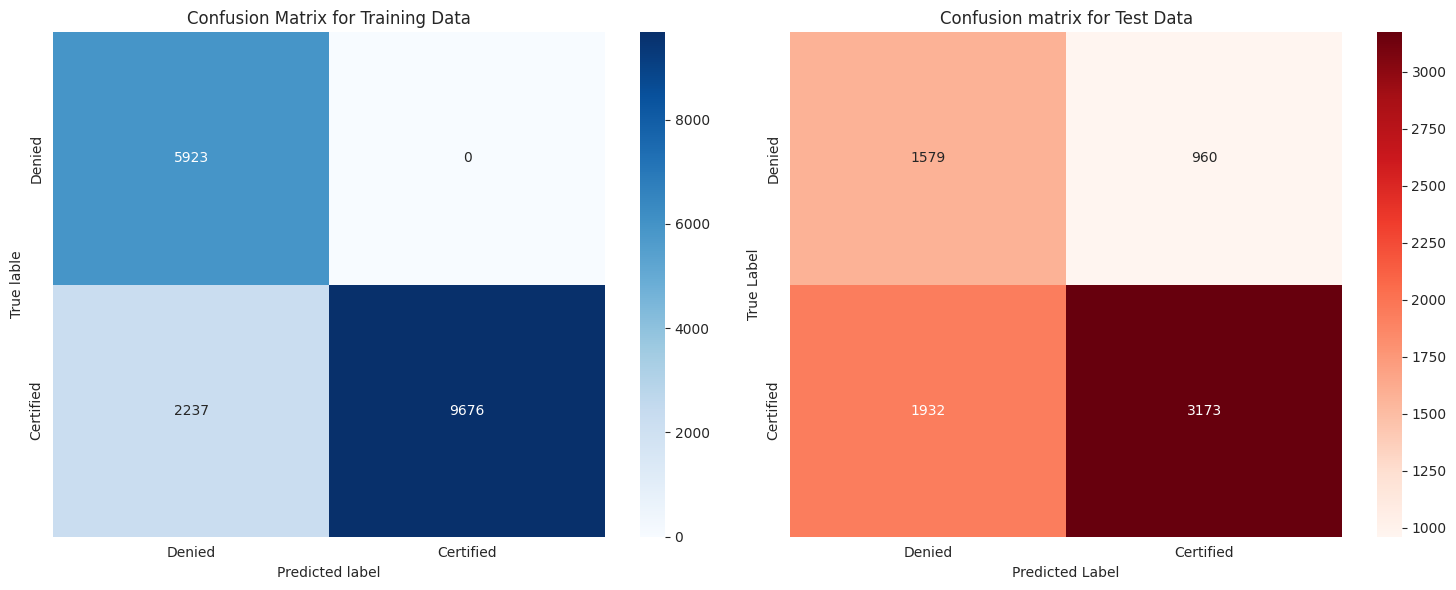

In [179]:
#Prediction for test data is arleady predicted

#now making prediction on training set
pred_und_train = dtree_und_rus.predict(X_train)
#making the prediction on oversampled data on test set
pred_und_test = dtree_und_rus.predict(X_test)

#Calculate confusion Matrix
train_cm = confusion_matrix(y_train, pred_und_train)
test_cm = confusion_matrix(y_test, pred_und_test)

#Ploting the confusion Matrix for the Train Data
fig, axes = plt.subplots(1, 2, figsize = (15, 6)) #Create a figure with two subplots
sns.heatmap(train_cm, annot = True, fmt ='d', cmap= 'Blues', ax = axes[0],
            xticklabels = ['Denied', 'Certified'],
            yticklabels = ['Denied', 'Certified'])
axes[0].set_title('Confusion Matrix for Training Data')
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True lable')


#Ploting the confusion Matrix for Test Data
sns.heatmap(test_cm, annot = True, fmt ='d', cmap = 'Reds', ax = axes[1],
            xticklabels = ['Denied', 'Certified'],
            yticklabels = ['Denied', 'Certified'])
axes[1].set_title('Confusion matrix for Test Data')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.savefig('Confusion_matrix.png')
plt.show();

##Observation for the Confusion Matrix on Trained and Test data for Undersampled Data:
  - This model shows that Undersampling technique has helped to model focus on right direction however still the model is overfit.

- **Training Data performance** : Model is trained well on identifyin the Denied cases now.

- **Test Data performance** : Score got down on test data the biggest focus area is that model has missed the 960 Denied Cases, Apart from this 1932 cases flagged as Denied which is actually a certified Cases.

- Undersampling techqniq has forced model to focus on denied case which is good thing for model performance.

##Visualize the Decision Tree on Underampled Data

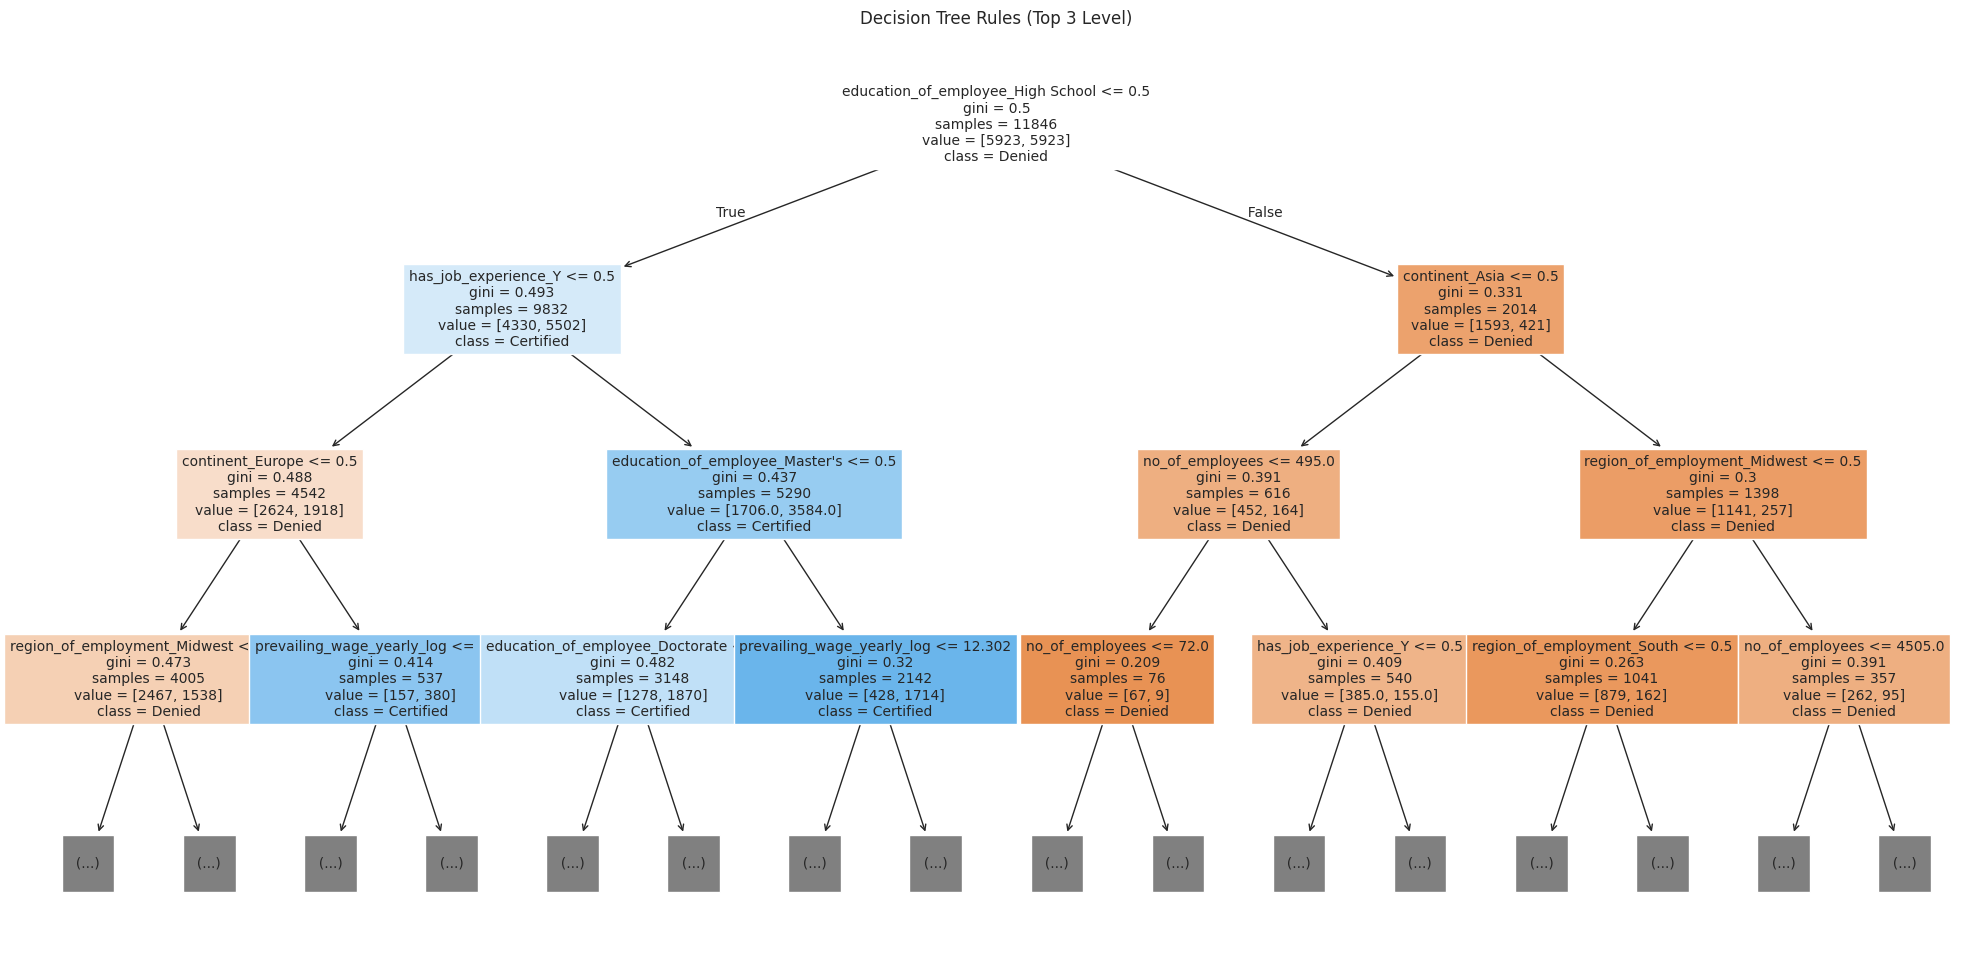

In [180]:
plt.figure(figsize = (25,12))
plot_tree(
    dtree_und_rus,                                                     #Decision Tree model
    max_depth=3,                                                       #Setting the max depth of tree
    feature_names = X_train.columns,                                   #Setup the name for the features in the plot
    class_names = ['Denied', 'Certified'],                             #Setup the name for the target variable in the plot instead of 0 and 1
    filled= True,                                                      #it gives the color as per the majority of classes
    fontsize =10                                                       #Font size of the text in the plot
)

plt.title("Decision Tree Rules (Top 3 Level)")                         #Giving the title for this plot
plt.savefig("Decision_Tree_undersampled.png")                          #Saving the plot in png format
plt.show();                                                             #Show the plot

# Observation on Decision Tree:
- In this tree pattern of asking question has changed little bit.
  - This Tree  shows the ability to take the decision in visa process.
  - It shows that how the model is reaching towards the prediction.
  - We can see which of the question decision Tree is asking to take next step.


- In this tree on Undersampled  data first question was asked about education_of_employee_of_high_school if True then has_job_experience for False continent_Asia.
  - If True for education_of_employee_of_high_school then Continent_europe and for education_of_employee_of_Masters.
  - So this is how it keep asking the questions.

##Visualize the Important Features from Decision Tree Model on Undersampled Data

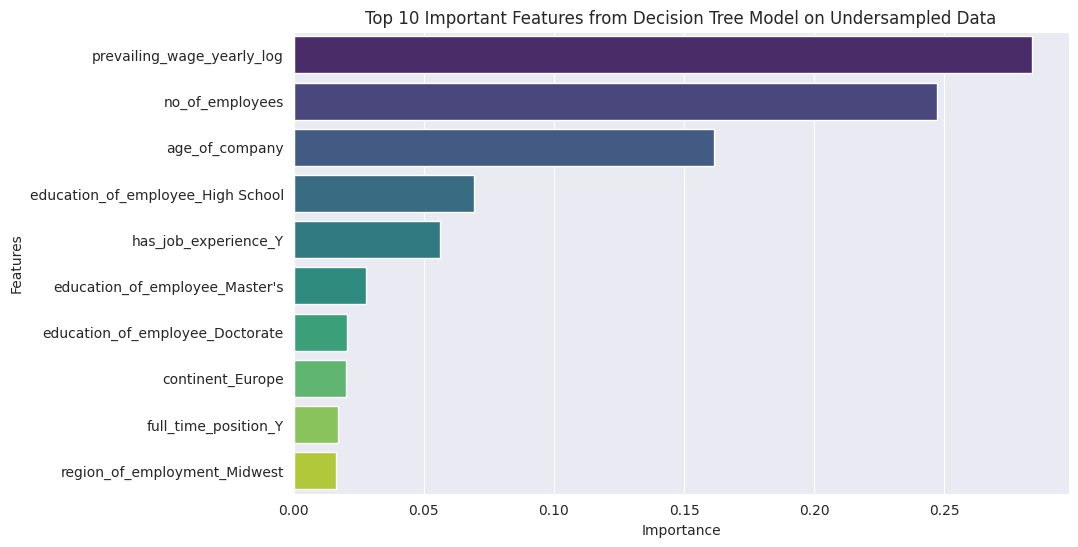

In [181]:
#Get the important features from Decision Tree Model
important_features = dtree_und_rus.feature_importances_

#Creating the pandas Dataframe for easier plotting
important_features_df = pd.DataFrame(
    {
        'Features' : X_train.columns,
        'Importance' : important_features
    }
).sort_values('Importance', ascending= False)

#top 10 important features
top_features = important_features_df.head(10)

#Creating the plot for importance features
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Importance', y= 'Features', data = top_features, palette = 'viridis')
plt.title('Top 10 Important Features from Decision Tree Model on Undersampled Data')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.savefig('Important_featureson Undersampled Data.png')
plt.show()

##Obsersvation:
  - Features contribution priority has not  changed in Undersampled Data that is same as it was with Oversampled data.

  - This chat shows clearly that which features are playing the major role to take the decision of selecting and rejecting the visa.
  
  - As we can see that prevailing_wage_yearly_log, no_of_employees, age_of_the_company and education_of_high_school are palying the major role in visa process.

  - **Business Insight** from this plot OFLC would know that which of the factors are most important to focus on.

##Visualize the Decision Rule for this Model on Underampled Data

In [71]:
#Shorter version of Decision Rules (Top 3 Levels)
decision_rules = export_text(dtree_und_rus, feature_names = list(X_train.columns), max_depth=3)
print(decision_rules)

|--- education_of_employee_High School <= 0.50
|   |--- has_job_experience_Y <= 0.50
|   |   |--- continent_Europe <= 0.50
|   |   |   |--- region_of_employment_Midwest <= 0.50
|   |   |   |   |--- truncated branch of depth 35
|   |   |   |--- region_of_employment_Midwest >  0.50
|   |   |   |   |--- truncated branch of depth 26
|   |   |--- continent_Europe >  0.50
|   |   |   |--- prevailing_wage_yearly_log <= 11.75
|   |   |   |   |--- truncated branch of depth 15
|   |   |   |--- prevailing_wage_yearly_log >  11.75
|   |   |   |   |--- truncated branch of depth 17
|   |--- has_job_experience_Y >  0.50
|   |   |--- education_of_employee_Master's <= 0.50
|   |   |   |--- education_of_employee_Doctorate <= 0.50
|   |   |   |   |--- truncated branch of depth 30
|   |   |   |--- education_of_employee_Doctorate >  0.50
|   |   |   |   |--- truncated branch of depth 18
|   |   |--- education_of_employee_Master's >  0.50
|   |   |   |--- prevailing_wage_yearly_log <= 12.30
|   |   |   |   

###Observation from this decision Rules on Undersampled Data:
  - By using Undersampling model has learned more deep pattern that help it to identify Denied cases.

  - **Top conditions** Starting point to take the decision on very important features like education of employee and prevailing wage(Salary)

   - **Overfit** Model is still overfit as we can see the list of decision rule so big and a general model does not make so big decision rule.

## 2. Building and Training the Random Forest with Undersampling

In [182]:
#instance creation for the model
#n_jobs =-1 will use all the available CPU resources to speed up the process of training
rf_und = RandomForestClassifier(n_estimators= 100, random_state =42, n_jobs = -1)

#Fitting the model
rf_und.fit(X_train_under, y_train_under)

#making the prediction
y_pred_rf_und = rf_und.predict(X_test)

## Model evaluation

In [183]:
#computing the accuracy of the model
acc_rf_und = accuracy_score(y_test, y_pred_rf_und)

#computing the f1 score for the model
f1_rf_und = f1_score(y_test, y_pred_rf_und)

#computing the classification report for the model
rf_und_class_report = classification_report(y_test, y_pred_rf_und, target_names = ['Denied', 'Certified'])

##Printing the result

In [184]:
print("Random Forest Performance on Undersampled Data")

print(f"Accuracy : {acc_rf_und : .4f}")
print(f"F1 Score : {f1_rf_und :.4f}")
print(' ')

print("Classification Report")
print(rf_und_class_report)

Random Forest Performance on Undersampled Data
Accuracy :  0.6770
F1 Score : 0.7366
 
Classification Report
              precision    recall  f1-score   support

      Denied       0.51      0.68      0.58      2539
   Certified       0.81      0.68      0.74      5105

    accuracy                           0.68      7644
   macro avg       0.66      0.68      0.66      7644
weighted avg       0.71      0.68      0.69      7644



##Observation:
 - This is the fantastic result compare to previous Decision Tree model.
  - **Improved Denied Cases** : The greatest achievement we got is precision for the Denied cases from 45% to 51%

  - **Improved Recall Cases** : Not just precision even Recall also got increased from 62% to 68% which means that model's ability is getting better to identify the Denied applicants.

  - **Intrestig Observation** : Recall for both Certified and Denied cases are the same as 68%


#3. Building and Training the BaggingClassifier with Undersampling

In [185]:
#Instance creation for the model
#n_jobs =-1 will use all the available CPU resources to speed up the process of training
bagg_clf_und = BaggingClassifier(n_estimators= 100, random_state =42, n_jobs = -1)


#fitting the model
bagg_clf_und.fit(X_train_under, y_train_under)


#making the prediction for the model
y_pred_bagg_und = bagg_clf_und.predict(X_test)

##Model Evaluation

In [186]:
#compting the accuracy for the model
acc_bagg_und = accuracy_score(y_test, y_pred_bagg_und)

#computing the f1 score for the model
f1_bagg_score = f1_score(y_test, y_pred_bagg_und)

#computing the classification report for the model
bagg_und_class_report = classification_report(y_test, y_pred_bagg_und, target_names =['Denied', 'Certified'])


#Printing the result

In [188]:
print("Bagging Classifier performance with undersampling")
print(f"Accuracy  : {acc_bagg_und : .4f}")
print(f"F1 Score : {f1_bagg_score : .4f}")
print(' ')

print("Classification Report")
print(bagg_und_class_report)

Bagging Classifier performance with undersampling
Accuracy  :  0.6695
F1 Score :  0.7310
 
Classification Report
              precision    recall  f1-score   support

      Denied       0.50      0.66      0.57      2539
   Certified       0.80      0.67      0.73      5105

    accuracy                           0.67      7644
   macro avg       0.65      0.67      0.65      7644
weighted avg       0.70      0.67      0.68      7644



##Observation:
 - We have found one more great player Bagging classifier perform well.
 **Good Performance on Denied cases** : This model is showing the ability to handle Denied Cases which is actually the main goal.
  - **Recall** :  Recall is now 66% which means model is now able to find 66% of accutal Denied Applicants.
  - **Precision** :  Precision is now at 50% which means if the model says applicants is Denied then it's correct with 50% of the time.


- **Comparison with Random Forest**
  - This is the most important part of analysis that compare with Random Forest classifier on same UnderSampled Data.
    - **Recall** : Random Forest (68%) Vs Bagging Classifer(66%). Random Forest is performing well to identifying on Denied Cases.
    - **Precision** : Random Forest (51%) Vs Bagging Classifer(50%). Here as well Random Forest is performing well Denied prediction.

    - **F1 Score** : Random Forest (58%) Vs Bagging Classifer(57%). Random Fores is the winner in the overall score for Denied Cases.

    - Although Bagging result is great however Random Forest is still performing well so far.

#4. Building and Training the AdaBoostingClassifier with Undersampling

In [189]:
#Instance creation for the model
adab_clf_und = AdaBoostClassifier(random_state =42, n_estimators =100)

#fitting the model
adab_clf_und.fit(X_train_under, y_train_under)

#Making the prediction on the model
y_pred_adab_und = adab_clf_und.predict(X_test)

##Model Evaluation

In [190]:
#computing the accuracy of the model
acc_adab_und = accuracy_score(y_test, y_pred_adab_und)

#computing the F1 Score for the model
adab_und_f1 = f1_score(y_test, y_pred_adab_und)

#computing the classification report for the model
adab_und_class_report = classification_report(y_test, y_pred_adab_und, target_names = ['Denied', 'Certified'])


##Printin the result

In [191]:
print("AdaBoost Classifier Performance on Undersampled Data")
print(f"Accuracy : {acc_adab_und : .4f}")
print(f"F1 Score : {adab_und_f1 : .4f}")
print(' ')

print("Classification Report")
print(adab_und_class_report)

AdaBoost Classifier Performance on Undersampled Data
Accuracy :  0.6945
F1 Score :  0.7592
 
Classification Report
              precision    recall  f1-score   support

      Denied       0.53      0.64      0.58      2539
   Certified       0.80      0.72      0.76      5105

    accuracy                           0.69      7644
   macro avg       0.67      0.68      0.67      7644
weighted avg       0.71      0.69      0.70      7644



##Observation:
 - This is the great result and we have not two contender with best performance.
 - The best part of this model is that it gives the highest precision of Denied Cases so far which is 53%

 - This model is great at finding the Denied Cases as it's recall for Denied cases is 64% although Random Forest is with 68% still we can consider this model is one of the great.


#5. Building and Training the GredientBoosting Classifier with Undersampling

In [192]:
#Instance creation for the model
gred_clf_und = GradientBoostingClassifier(random_state =42, n_estimators =100)

#fitting the model
gred_clf_und.fit(X_train_under, y_train_under)

#Making the prediction on the model
y_pred_gred_clf_und = gred_clf_und.predict(X_test)

##model Evaluation


In [193]:
#computing the accuracy of the model
acc_gred_und = accuracy_score(y_test, y_pred_gred_clf_und)

#computing the F1 Score for the model
f1_gred_und = f1_score(y_test, y_pred_gred_clf_und)

#computing the classification report for the model
gred_und_class_report = classification_report(y_test, y_pred_gred_clf_und, target_names = ['Denied', 'Certified'])


##printin the resul

In [194]:
print("GredientBoosting Classifier Performance on Undersampled Data")
print(f"Accuracy : {acc_gred_und : .4f}")
print(f"F1 Score : {f1_gred_und : .4f}")
print(' ')

print("Classification Report")
print(gred_und_class_report)

GredientBoosting Classifier Performance on Undersampled Data
Accuracy :  0.7075
F1 Score :  0.7672
 
Classification Report
              precision    recall  f1-score   support

      Denied       0.55      0.68      0.61      2539
   Certified       0.82      0.72      0.77      5105

    accuracy                           0.71      7644
   macro avg       0.68      0.70      0.69      7644
weighted avg       0.73      0.71      0.71      7644



##Observation:
 - GradientBoosting is the great performer among all the models.
 - The intresting fact of this model is it give the result like "best of both worlds"

 - It has given the highest precision for the Denied Cases which is 55% which means it is more realible on Denied prediction along with less false alarm.

 - Not just precision, it's recall also high as similar to Random Forest which is the highest recall which means it's ability to identify the Denied cases is strong.

 - Perfect balanced score of this model reflect in the F1 Score as well which has reached now at 61% which is the highest F1 score so far.

 - Apart from all of these it's accuracy also great with 71%.
 - This model shows it's great ability in Recall , Denied F1 Score and Accuracy as well.

#Report for all the models on Undersample dataset using RandomUndersampler

In [195]:
#Dictionary for the performance for each model
Undersample_data = {
    'Model' : ['Decision Tree', 'Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy' : [0.62, 0.67, 0.66, 0.69, 0.70],
    'F1_Score' : [0.68, 0.73, 0.73, 0.75, 0.76],
    'Recall_Certified' : [0.62, 0.68, 0.67, 0.72, 0.72],
    'Recall_Denied' : [0.62, 0.68, 0.66, 0.64, 0.68],
    'Precision_Certified' : [0.77, 0.81, 0.80, 0.80, 0.82],
    'Precision_Denied' : [0.45, 0.51, 0.50, 0.53, 0.55],
    'F1_Score_Certified' : [0.69, 0.74, 0.73, 0.76, 0.77],
    'F1_Score_Denied' : [0.52, 0.58, 0.57, 0.58, 0.61]
}

#Create the dataframe from the dictionary
comparison_df = pd.DataFrame(Undersample_data)

#printing the dataframe in tabular format
print(comparison_df.to_markdown(index = False))

| Model             |   Accuracy |   F1_Score |   Recall_Certified |   Recall_Denied |   Precision_Certified |   Precision_Denied |   F1_Score_Certified |   F1_Score_Denied |
|:------------------|-----------:|-----------:|-------------------:|----------------:|----------------------:|-------------------:|---------------------:|------------------:|
| Decision Tree     |       0.62 |       0.68 |               0.62 |            0.62 |                  0.77 |               0.45 |                 0.69 |              0.52 |
| Random Forest     |       0.67 |       0.73 |               0.68 |            0.68 |                  0.81 |               0.51 |                 0.74 |              0.58 |
| Bagging           |       0.66 |       0.73 |               0.67 |            0.66 |                  0.8  |               0.5  |                 0.73 |              0.57 |
| AdaBoost          |       0.69 |       0.75 |               0.72 |            0.64 |                  0.8  |               

#Criteria 6

##Hyperparameter Tuning

- Based on all experiment we have run we have found following 3 models through which we will continue our working.

- These 3 models consistently gave the best performance by showing their ability to identify the Denied Cases of visa application, which is the main goal of models.

## Here are the 3 models and the reason why we have selected these 3 models

##1. Gradient Boosting (Champion)
  - **Winner** : This is the winner. Its given the best precision for Denied Cases (55%), Recall (68%) and F1 Score (61%)

  - **Goal with Tuning** : Although it is the best already hwoever by using it we will make it more better.

## 2. Random Forest it's he Recall King  
  - This model has given the best performance by identifying the Denied cases it's Recall is (68%)

  - **Goal with Tuning** : To maintain it's high recall we need to increase the precision to decrease the false alarm.

## 3. AdaBoost an alternative for Highest Precision
  - This model has given and intresting result with precision (53%) and recall (64%) which consider a great balanced score.

  - **Goal with Tuning** : We will try to push the recall if it would peform better among top models.


## Why we have selected the Undersampled Data to train our tuned model:
  - We have selected the Undersampled Data to tune these 3 models (Random Forest, GredientBoosting and AdaBoosting ) intially these models perform better to identify the Denied cases on Undersampled data which is the main goal of this project.

  - When we have trained the all 5 models on all kind of data (Original, Oversampled and Undersampled) we have found that Trained model on undersampled data has performed well on high recall and f1 Score for Denied Cases

##1. Gredient Boosting Classifier with hyperparameter on undersampled data.


- We will start with our champion model Gradeient Boosting by using the technique called GridSearchCV with Cross Validation (CV). This tool considered as smart assistance which will automatically find the best combination of hyperparameter that will find the best possible version of the data.

In [196]:
#Define the hyperparameter grid which will test for tuning the model
param_grid_gb = {
    'n_estimators' : [100, 200],              #set the number of tree to process
    'learning_rate' : [0,  0.5, 0.1],         #It decide the appropriate speed of learning
    'max_depth' : [3, 5],                     #This will decide the maximum depth of the tree.
    'min_samples_leaf' :[5, 10]               #Required minimum samples in leaf node
}

#Instance creation for the model as GridSearchCV with required parameters.
grid_search_gb = GridSearchCV(                      #Setting up the tool(GridSearchCV) to find the best possible combination of hyperparameters
    estimator= GradientBoostingClassifier(random_state =42),    #Initilize the Gradient Boosting Model with random State
    param_grid = param_grid_gb,                                 #Define the parameter for the model
    scoring = 'f1_macro',                                       #Evaluat the model by Calculating the F1SCore by averaring them
    cv =3,                                                      #Cross Validate - Define the number of split to train and test
    verbose = 2,                                                #this track the progress of program at running stage
    n_jobs =-1                                                  #this will use all the available CPU resources to speed up the process of training
)

#Fitting the model on TrainING SET on undersampled data
grid_search_gb.fit(X_train_under, y_train_under)


#Best setting we found from the tuning
print("Best Parameter we have found with tuning")
best_params = grid_search_gb.best_params_
print(best_params)

#Get the Best model and then making prediction with best tuned model
best_model = grid_search_gb.best_estimator_
#making the prediction on best model
y_pred_best_model = best_model.predict(X_test)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameter we have found with tuning
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 10, 'n_estimators': 200}


## Model Evaluation

In [197]:
#Computing the accuracy for the model
acc_gb_tuned_under = accuracy_score(y_test, y_pred_best_model)

#computing the F1 score for the model
f1_gb_tuned_under = f1_score(y_test, y_pred_best_model)

#computingthe classfication report
gb_tuned_class_report = classification_report(y_test, y_pred_best_model, target_names = ['Denied', 'Certified'])


##Printing the Result



In [198]:
print("Performance report for Tuned Gredient Boosting Classifier on UnderSample Data")
print(f"Accuracy : {acc_gb_tuned_under : .4f}")
print(f"F1 Score : {f1_gb_tuned_under}")
print(' ')

print("Classification Report of GB_Tuned Model")
print(gb_tuned_class_report)

Performance report for Tuned Gredient Boosting Classifier on UnderSample Data
Accuracy :  0.7049
F1 Score : 0.764656791153766
 
Classification Report of GB_Tuned Model
              precision    recall  f1-score   support

      Denied       0.54      0.68      0.60      2539
   Certified       0.82      0.72      0.76      5105

    accuracy                           0.70      7644
   macro avg       0.68      0.70      0.68      7644
weighted avg       0.73      0.70      0.71      7644



##Observation:
  - Results of Gradient Boosting are almost same even after tuning the model
    - For the Denied Cases F1 Score (60%) and Precision(54%) has got down a bit however recall (68%) is same.
    
    
- Why we don't get improvement:
    - It doesn't mean something wrong with coding.
    - **Default Setting was best** : There is a possiblity that standard setting was enough to reach the highest potential of the model that's why even after tuning the results are almos same.
    
- Experiment is sucessfull and confirms that Default Gradient Boosting is strong and stable.

## 2. Random Forest Classifier with hyperparameter on undersampled data.


In [199]:
#Define the Hyperparamet grid for Random Forest Classifier
param_grid_rf = {
    'n_estimators' : [100, 200],                                              #set the number of tree to process
    'max_depth' : [10, 20],                                                   #maximum depth of each tree
    'min_samples_leaf' : [5, 10],                                             #Required minimum samples leaf nodes
    'criterion' : ['gini', 'entropy']                                         #Function to measure the quality of split (impurity rate)
}

#Instance creation for the model as GridSearchCV with required parameters.
grid_search_rf = GridSearchCV(
    estimator = RandomForestClassifier(random_state =42, n_jobs =-1),         #Initilize the Random ForestModel with random State
    param_grid = param_grid_rf,                                               #Define the parameter for the model
    scoring = 'f1_macro',                                                     #Evaluat the model by Calculating the F1SCore by averaring them
    cv =3,                                                                    #Cross Validate - Define the number of split to train and test
    verbose= 2,                                                               #this track the progress of program at running stage
    n_jobs = -1                                                              #this will use all the available CPU resources to speed up the process of training
)



#Run the gridSearch CV on undersampled data
grid_search_rf.fit(X_train_under, y_train_under)


#Getting the best found paramater
print("Best Parameter we have found with tuning")
best_param = grid_search_rf.best_params_
print(best_param)

#Getting the best modela and evaluate it.
best_model = grid_search_rf.best_estimator_


#making the prediction on best model we found
y_pred_best_model_tuned_rf = best_model.predict(X_test)



Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameter we have found with tuning
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 200}


##MOdel Evaluation

In [200]:
#compute the accuracy of the model
acc_rf_tuned_under = accuracy_score(y_test, y_pred_best_model_tuned_rf)

#compute the F1 Score for the model
F1_Score_tuned_rf = f1_score(y_test, y_pred_best_model_tuned_rf)


#compute the classification report of tuned RF model
tuned_rf_class_report = classification_report(y_test, y_pred_best_model_tuned_rf, target_names = ['Denied', 'Certified'])

##Printing the result


In [201]:
print("Preformance of Tuned Random_forest Classifier on undersample data")
print(f"Accuracy : {acc_rf_tuned_under : .4f}")
print(f"F1 Score : {F1_Score_tuned_rf : .4f}")
print(' ')

print("Classification Report")
print(tuned_rf_class_report)

Preformance of Tuned Random_forest Classifier on undersample data
Accuracy :  0.7130
F1 Score :  0.7769
 
Classification Report
              precision    recall  f1-score   support

      Denied       0.56      0.64      0.60      2539
   Certified       0.81      0.75      0.78      5105

    accuracy                           0.71      7644
   macro avg       0.68      0.70      0.69      7644
weighted avg       0.73      0.71      0.72      7644



##Observation:
  - **Excellent performance** : Random Forest has peformed very well with hyperparameter

    - **Improved Precision (Denied)** Big jump in the precision from (51% to  56%)
    - **Recall down a bit (Denied)** Recall has got down from Un-Tuned 68% to Tuned 64%
    - **F1 Score Improved (Denied)** F1 Score has improved from Un-Tuned 58% to Tuned 60%

- **Comparison with GradientBoosting**:
  - Comparison with tuned Random Forest with our previous Un-tuned Gradeient Boost Model.
    - **Precision (Denied)** : Tuned Random Forest (56%) is greater than Gradient boosting (55%)
      - New Random Forest is getting better and it's prediction is more reliable now.

    - **Recall (Denied)** : Gradient Boosting(64%) is better than Tuned Random Forest(61%)
      - Gradient Boosting is still better in identifying Denied Cases

    - **F1 Score (Denied)** : Gradient Boosting (61%) is greater than Tunen Random Forest(60%)
      - In overall balance score Gradient Boosting is still better


## 3. AdaBoost Classifier with hyperparameter on undersampled data.


In [202]:
#Defining the hyperparameter grid for adaboosting model
param_grid_adab = {
    'n_estimators' : [50, 100, 200],                                              #set the number of tree to process
    'learning_rate' : [0.1,  0.5, 1.0]                                            #It decide the appropriate speed of learning
}

#Instance creation for the Tuned AdaBoosting Classifier on undersampled data
grid_search_ada_tuned = GridSearchCV(
    estimator = AdaBoostClassifier(random_state =42),                             #Initilize the Random ForestModel with random State
    param_grid = param_grid_adab,                                                 #Define the parameter for the model
    cv =3,                                                                        #Cross Validate - Define the number of split to train and test
    scoring = 'f1_macro',                                                         #Evaluat the model by Calculating the F1SCore by averaring them
    verbose =2,                                                                   #this track the progress of program at running stage
    n_jobs = -1                                                                   #this will use all the available CPU resources to speed up the process of training
)

#Fitting the tuned model
grid_search_ada_tuned.fit(X_train_under, y_train_under)

#Printing the best parameter we found from tuning
print("Best found parameter")
best_param = grid_search_ada_tuned.best_params_
print(best_param)

#Getting the best model
best_model = grid_search_ada_tuned.best_estimator_

#making the predictionon with tuned model
y_pred_best_model_tuned_ada = best_model.predict(X_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best found parameter
{'learning_rate': 0.5, 'n_estimators': 50}


##Model Evaluation

In [203]:
#computing the accuracy of the model
acc_adab_tuned_under = accuracy_score(y_test, y_pred_best_model_tuned_ada)

#computing the f1 Score of the model
f1_adab_tuned_under = f1_score(y_test, y_pred_best_model_tuned_ada)

#computing the classification report on model
adab_tuned_class_report = classification_report(y_test, y_pred_best_model_tuned_ada, target_names=['Denied', 'Certified'])


##printing the result

In [204]:
print("Performance of Tuned AdaBoosting Classifier on Undersampled Data")
print(f"Accuracy : {acc_adab_tuned_under : .4f}")
print(f"F1 Score : {f1_adab_tuned_under : .4f}")
print(' ')

print("Classification Report")
print(adab_tuned_class_report)

Performance of Tuned AdaBoosting Classifier on Undersampled Data
Accuracy :  0.7068
F1 Score :  0.7751
 
Classification Report
              precision    recall  f1-score   support

      Denied       0.55      0.61      0.58      2539
   Certified       0.79      0.76      0.78      5105

    accuracy                           0.71      7644
   macro avg       0.67      0.68      0.68      7644
weighted avg       0.71      0.71      0.71      7644



#Observation:
  - Tuning was sucessfull as though the improvement is not so much surprising.Let's compare Tuned AdaBoost with Un-Tuned Version of AdaBoost on undersampled Data.
    - Precision for Denied got increased from 53% to 55%  
    - Recall got down a bit from Un-tuned(64%) to Tuned(61%)
    - F1 Score has no change in the score.

- As precision got increased which means prediction of Adaboost is more realible now however Recall got down as it sacrificed from (64% to 61% ) that's why F1 is same.

#Criteria 7

#Performance of best 3 Tuned Model on Undersampled data.

In [205]:
#Dictionary for the performance for each model
tuned_model = {
    'Model' : ['Gradient Boosting', 'Random Forest', 'AdaBoost'],
    'Accuracy' : [0.70, 0.71, 0.70],
    'F1_Score' : [0.76, 0.77, 0.77],
    'Recall_Certified' : [0.72, 0.75, 0.76],
    'Recall_Denied' : [0.68, 0.64, 0.61],
    'Precision_Certified' : [0.82, 0.81, 0.79],
    'Precision_Denied' : [0.54, 0.56, 0.55],
    'F1_Score_Certified' : [0.76, 0.78, 0.78],
    'F1_Score_Denied' : [0.60, 0.60, 0.58]
}

#Create the dataframe from the dictionary
comparison_df = pd.DataFrame(tuned_model)

#printing the dataframe in tabular format
print(comparison_df.to_markdown(index = False))

| Model             |   Accuracy |   F1_Score |   Recall_Certified |   Recall_Denied |   Precision_Certified |   Precision_Denied |   F1_Score_Certified |   F1_Score_Denied |
|:------------------|-----------:|-----------:|-------------------:|----------------:|----------------------:|-------------------:|---------------------:|------------------:|
| Gradient Boosting |       0.7  |       0.76 |               0.72 |            0.68 |                  0.82 |               0.54 |                 0.76 |              0.6  |
| Random Forest     |       0.71 |       0.77 |               0.75 |            0.64 |                  0.81 |               0.56 |                 0.78 |              0.6  |
| AdaBoost          |       0.7  |       0.77 |               0.76 |            0.61 |                  0.79 |               0.55 |                 0.78 |              0.58 |


##Visualization of Important Metrics for Denied Cases - Recall, Precision and F1 Score

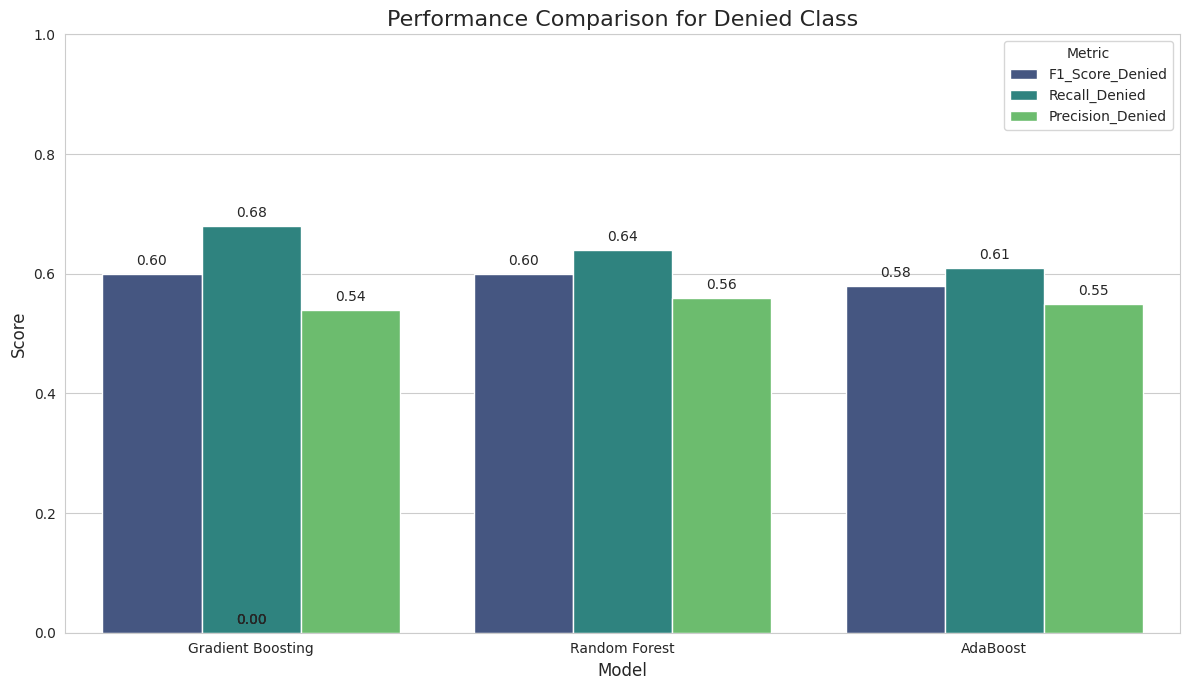

In [206]:
# 3. Create a Bar Chart for Visual Comparison
# We will focus on the most important metrics for the 'Denied' class
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Visualize the F1-Score, Precision and Recall for the 'Denied' class
df_plot = comparison_df[['Model', 'F1_Score_Denied', 'Recall_Denied', 'Precision_Denied']]

# Reshape the DataFrame to make it easy to plot
df_plot_melted = df_plot.melt('Model', var_name='Metric', value_name='Score')

# Create the bar plot
ax = sns.barplot(data=df_plot_melted, x='Model', y='Score', hue='Metric', palette='viridis')

# Add score labels on top of each bar for clarity
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.title('Performance Comparison for Denied Class', fontsize=16)       #Creating the title for Performance plot
plt.ylabel('Score', fontsize=12)                                        #Name and font size for the Xlablel
plt.xlabel('Model', fontsize=12)                                        #Name and font size for the ylablel
plt.ylim(0, 1.0)                                                        #Set the y-axis limit from 0 to 1 for scores
plt.legend(title='Metric')                                              #Add a legend to the plot
plt.tight_layout()                                                      #Adjust the layout to prevent overlap of labels
plt.savefig('tuned_models_comparison.png')                              #Save the plot as image


##Observation:
- After analysing the best tuned model performance I have found that Tuned Gradient Boosting Classifier is the Final model for this project

- The final selection between Tuned Random Forest and Tuned Gradient Boosting was very competative both models performs very well however as per the requirement of the project Gradient Boosting is the better choice.

**Gradient Boosting (Recall Champion)** : Goal of our project is to identify those applicants whose chances are hight to get rejected so for this Recall is imortant metric for this task.

  - Recall for Denied cases of Gradient Boosting is 68% whch is the highest score among top three models. It means model is more capable to identify the Denied cases.

- **The Recall Vs Precision Tradeoff** : It is fact that Random Forest precision is 56% which is high from gradient boosting.
    - As per the business requirement misssing the Denied cases is much bigger loss than saying Denied to Certified Cases by mistake.

    - A human officer can check those cases which has been flagged as Denied by mistake however if any risky applicants would missed then it would be processed further which lead to big loss for the company.

 - Conclusion: Our final model is Gradient Boosting Classifier because it is best to identify the Denied cases as it's recall has the highest (68%)


## Checking the performance on the Test Data with final model(Tuned Gradient Boosting)

In [207]:
#We are using the same model with same hyperparamet which were made above while tuning the model Gradient Boosting.
#Repeating the same code here would not right practice so I have simply start with predicting the model


#making the final prediction on the test data
final_prediction = best_model.predict(X_test)

## Model Evaluation

In [208]:
#computing the accuracy of the model
acc_final_tuned_gb = accuracy_score(y_test, final_prediction)

#computing the F1 Score for the model
F1_score_final_tuned_gb = f1_score(y_test, final_prediction)

#compute the classification report on model
final_tuned_gb_class_report = classification_report(y_test, final_prediction, target_names = ['Denied', 'Certified'])

#Printing the Result

In [209]:
print("Peformance of Final Model (Gradient Boosting on Test Data)")
print(f"Accuracy : {acc_final_tuned_gb : .4f}")
print(f"F1 Score : {F1_score_final_tuned_gb}")
print(' ')
print("Classification Report")
print(final_tuned_gb_class_report)

Peformance of Final Model (Gradient Boosting on Test Data)
Accuracy :  0.7068
F1 Score : 0.7750677506775068
 
Classification Report
              precision    recall  f1-score   support

      Denied       0.55      0.61      0.58      2539
   Certified       0.79      0.76      0.78      5105

    accuracy                           0.71      7644
   macro avg       0.67      0.68      0.68      7644
weighted avg       0.71      0.71      0.71      7644



##Performance of FinalTuned Model (Gradient Boosting) on Undersampled data.

In [212]:
final_model = {
    'Model' : ['Final_Model (Gradient Boosting)'],
    'Accuracy' : 0.70,
    'F1_Score' : 0.77,
    'Recall_Certified' : 0.76,
    'Recall_Denied' : 0.61,
    'Precision_Certified' : 0.79,
    'Precision_Denied' : 0.55,
    'F1_Score_Certified' : 0.78,
    'F1_Score_Denied' : 0.58
}

#Create the dataframe from the dictionary
comparison_df = pd.DataFrame(final_model)

#printing the dataframe in tabular format
print(comparison_df.to_markdown(index = False))

| Model                           |   Accuracy |   F1_Score |   Recall_Certified |   Recall_Denied |   Precision_Certified |   Precision_Denied |   F1_Score_Certified |   F1_Score_Denied |
|:--------------------------------|-----------:|-----------:|-------------------:|----------------:|----------------------:|-------------------:|---------------------:|------------------:|
| Final_Model (Gradient Boosting) |        0.7 |       0.77 |               0.76 |            0.61 |                  0.79 |               0.55 |                 0.78 |              0.58 |


## Observation:  
 - This performance shows that selected model (Tuned Gradient boost Model)is the robust and effective to solve the Business problem. Model has maintained the great balance between the Denied and Certified Cases.

- **Great recall for Denied Class** : The biggest strength of the model is good recall (61%) which means from the whole test data Model was able to successfully identify the 61% Denied cases.
  - This woudl be great for the Office of Foreign Labor Certification (OFLC) as they will get the filtered data where large number of risky applicants alredy flagged which will save lots of time and avoid the false approval on risky candidates.

- **Realiable Precision(Denied)** : Model given the precision (55%) it means when model says Denied to applicants then it is correct 55% of the time. it gives the confidence to Office of Foreign Labor Certification (OFLC) that spending time on those cases which were flagged by the system.


- **Great Overall balance(Denied)** : F1 Score is 58% which shows that this model maitain great balance between recall and precision. It means neither it's giving more false alarm nor missing the risky cases.


- **Great Overall Accuracy** : Model overall accuracy is 71% this confirms that it is not only identifying the Denied cases even it's good to identify the certified cases as well.


- **Final Conclusion** : This final model's report confirms that Tuned Gradient Boosting Classifier is the right choice and it will expedite the process of Office of Foreign Labor Certification (OFLC) and help them to make better decision for selecting and rejecting the Visa Application.


##Visualize the Important Features from Final Model(Gradient Boosting)

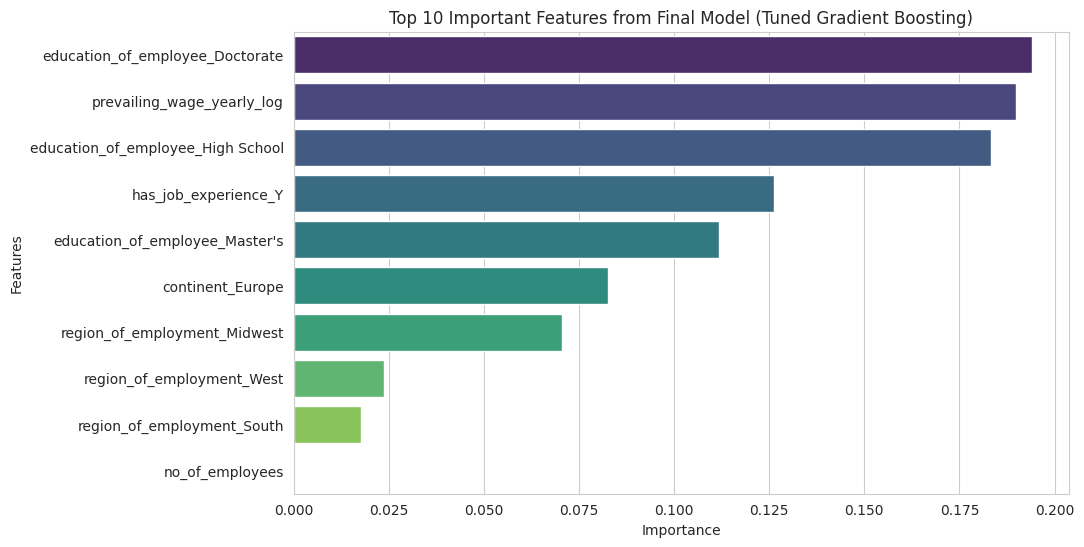

In [213]:
#Get the important features from Decision Tree Model
important_features = best_model.feature_importances_

#Creating the pandas Dataframe for easier plotting
important_features_df = pd.DataFrame(
    {
        'Features' : X_train.columns,
        'Importance' : important_features
    }
).sort_values('Importance', ascending= False)

#top 10 important features
top_features = important_features_df.head(10)

#Creating the plot for importance features
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Importance', y= 'Features', data = top_features, palette = 'viridis')
plt.title('Top 10 Important Features from Final Model (Tuned Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.savefig('Important_features.png')
plt.show()

##Obsersvation:
  - This chat shows clearly that which features are playing the major role to take the decision of selecting and rejecting the visa.
  - As we can see that education_of_employee_doctrate, prevailing_wage, education_of_employee_high_school, has_job_experience, education_of_employee_masters, continent_europe and region_of_employment_midwest are palying the major role in visa process.

  - **Business Insight** from this plot OFLC would know that which of the factors are most important to focus on.

#Criteria 8

  - Goal of our project is make the model which will be able to identify the Denied Cases. To achieve this goal we have created 5 different models and run them on different dataset Original, Oversampled, Undersampled and in the end we have selected the best model among all 5 and then tuned that model improve it's result.


## Below is the table that will walk you through journey of model performance on various metrics, Denied for Recall, Precision and F1 Score.

In [214]:
# 1. Bring all the score summary here to make the comparison table for all the models

#Report for all the models on Original dataset
original_data = {
    'Model' : ['Decision Tree', 'Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy' : [0.64, 0.71, 0.71, 0.72, 0.74],
    'F1_Score' : [0.73, 0.79, 0.79, 0.81, 0.81],
    'Recall_Denied' : [0.49, 0.49, 0.50, 0.42, 0.48],
    'Precision_Denied' : [0.47, 0.59, 0.59, 0.64, 0.65],
    'F1_Score_Denied' : [0.48, 0.54, 0.54, 0.51, 0.55]
}

#Report for all the models on Oversample dataset on Oversampled Data(SMOTE)
oversampled_data = {
    'Model' : ['Decision Tree', 'Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy' : [0.65, 0.71, 0.71, 0.72, 0.73],
    'F1_Score' : [0.73, 0.78, 0.78, 0.80, 0.81],
    'Recall_Denied' : [0.51, 0.52, 0.53, 0.46, 0.51],
    'Precision_Denied' : [0.48, 0.57, 0.57, 0.63, 0.62],
    'F1_Score_Denied' : [0.50, 0.54, 0.55, 0.53, 0.56]
}

#Report for all the models on Undersample dataset using RandomUndersampler
undersampled_data = {
    'Model' : ['Decision Tree', 'Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy' : [0.62, 0.67, 0.66, 0.69, 0.70],
    'F1_Score' : [0.68, 0.73, 0.73, 0.75, 0.76],
    'Recall_Denied' : [0.62, 0.68, 0.66, 0.64, 0.68],
    'Precision_Denied' : [0.45, 0.51, 0.50, 0.53, 0.55],
    'F1_Score_Denied' : [0.52, 0.58, 0.57, 0.58, 0.61]
}


#Performance of best 3 Tuned Model on Undersampled data.
tuned_model = {
    'Model' : ['Gradient Boosting', 'Random Forest', 'AdaBoost'],
    'Accuracy' : [0.70, 0.71, 0.70],
    'F1_Score' : [0.76, 0.77, 0.77],
    'Recall_Denied' : [0.68, 0.64, 0.61],
    'Precision_Denied' : [0.54, 0.56, 0.55],
    'F1_Score_Denied' : [0.60, 0.60, 0.58]
}

#Performance of FinalTuned Model (Gradient Boosting) on Undersampled data.
final_model = {
    'Model' : ['Final Tuned GB'],
    'Accuracy' : [0.70],
    'F1_Score' : [0.77],
    'Recall_Denied' : [0.61],
    'Precision_Denied' : [0.55],
    'F1_Score_Denied' : [0.58]
}

# 2. Convert dictionaries (Report from all the models) to DataFrames and add new column called 'Stage'
original_df = pd.DataFrame(original_data)
original_df['Stage'] = '1.Original Data'

oversampled_df = pd.DataFrame(oversampled_data)
oversampled_df['Stage'] = '2.Oversampled'

undersampled_df = pd.DataFrame(undersampled_data)
undersampled_df['Stage'] = '3.Undersampled'

tuned_df = pd.DataFrame(tuned_model)
tuned_df['Stage'] = '4.Tuned Models'

final_df = pd.DataFrame(final_model)
final_df['Stage'] = '5.Final Model'

# 3. clubbed all dataframes into one table
# I have selected only most important features for the final report
key_columns = ['Stage', 'Model', 'Accuracy', 'F1_Score', 'Recall_Denied', 'Precision_Denied', 'F1_Score_Denied']
df_summary_full = pd.concat([
    original_df[key_columns],
    oversampled_df[key_columns],
    undersampled_df[key_columns],
    tuned_df[key_columns],
    final_df[key_columns]
], ignore_index=True)


# 4. Print the final combined table
print("--- Performance Summary for all the Models ---")
print(' ')
print(df_summary_full.to_markdown(index=False, numalign="center", stralign="left"))

--- Performance Summary for all the Models ---
 
| Stage           | Model             |  Accuracy  |  F1_Score  |  Recall_Denied  |  Precision_Denied  |  F1_Score_Denied  |
|:----------------|:------------------|:----------:|:----------:|:---------------:|:------------------:|:-----------------:|
| 1.Original Data | Decision Tree     |    0.64    |    0.73    |      0.49       |        0.47        |       0.48        |
| 1.Original Data | Random Forest     |    0.71    |    0.79    |      0.49       |        0.59        |       0.54        |
| 1.Original Data | Bagging           |    0.71    |    0.79    |       0.5       |        0.59        |       0.54        |
| 1.Original Data | AdaBoost          |    0.72    |    0.81    |      0.42       |        0.64        |       0.51        |
| 1.Original Data | Gradient Boosting |    0.74    |    0.81    |      0.48       |        0.65        |       0.55        |
| 2.Oversampled   | Decision Tree     |    0.65    |    0.73    |      0.51 

##Observation:
  - **Weak Performance on Original Dataset** : When we have trained the models on original dataset then recall Denied was very less (42% to 50%) which means model could not identify half of the  denied cases.
    - Although AdaBoost and Gradient Boosting given the great peformance with precision (64% to 65% ) however these were enough to consider as good model.

  - **Performance on Oversampled data (SMOTE)** : When we have used SMOTE technique then Recall (Denied) was improved little bit(1-4%) hwoever precision was reduced.
    - There was and improvement for sure however it was not upto the mark.

  - **Performance on Undersampled data(The Game Changer)** : Undersampling technique has given the outstanding performance. Recall (Denied) got suddenly jump up with 62% to 68% .
    - Gradient boosting and Adaboosting has touched the recall(Denied) with 68% which was the fantastic performance.

  - **Performance improved by Tuning** : When we have tuned the model on Undersampled data then model's imporovement has shown great progress precision of Random Forest was increased from 51% to 56% which make the model more realible.
    - With the help of tuning techniqe the model strength was increased and their weaknes got decrease which helps us to find the best final model.


  - **Conclusion** : Whole comparison shows that secret of the success of this project is undersampling technique. It doubled the strengh of models for identifying the Denied cases.
    - After this powerful ensemble models like Gradient Boosting and hyperparameter technique has reach those models at great level.   

## Key Takeaways for the Business and Recommendations :


- We have now completed a sucessfull Machine which will expedite the process of Office of Foreign Labor Certification (OFLC) and help them to make better decision for selecting and rejecting the Visa Application.

- Following are the point that would be Takeway and recommendations for the OFLC.

- **Recommendations #1** : Model Adoption
  - Our biggest recommendations is for the OFLC to start using the Tuned Gradient Boosting Model in their Visa Process.
  - **What will this do** : This model would analyze to each application and give the prediction score and based on that prediction score model will automatically shortlist or flag the risky applicants.

  - **Company Benifits** : By using this model OFLC work would be easy. Now they don't have to find the risky applicants from crowd of applications. System will provide the priority list to OFLC to make thier task easy.


- **Recommendations #2** : Use the model as assistant:
  - it is crutial to understand that this model is not to replace the human officer infact it is for the help them.
  - Goald of model is to shortlist the risky applicants however the final decision would be taken by Human officer. Officer can use the priority list by model and give his attentiond on those cases where human involvement is required.

  - **Company Benifits** : In this process Human intelligence remain intact in the company also by any chance deserving applicants would not be rejected by model's mistake. This system works well when man and machine approach will work together.

- **Recommendations #3** : Focus on key drivers of the model:
  - Our model has learned those factors which plays an important role in the process of approval or rejection of Visa. OFLC can use those insights.
    - **Key Drivers** : Officers can use the insights from the features like education_of_employees, has_job_experience, prevailing_wage, unit_of_wage these are the factors can help officer to take decision on visa approval.

    - **Company Benifits** : By using the insights from those features company can modify thier guidelines so that company will have the idea how a suitable profile look like. With this process they can avoid inadvertently mistakes in future.  


##Final Conclusion for the Business:
  This model can be the Game Changer for the OFLC. By using this model OFLC would not just save the time and money, they would able to make thier visa process consistent and unbiased. it will increase their overall efficiency and allowing them to  better managem the talent coming into America.